
# ***Part 1***

# 1. Demonstrate code of SVD


In [ ]:
#Demonstrate code of SVD
import torch

# Create a simple matrix
X = torch.tensor([[1., 2., 3.],
                 [4., 5., 6.]])  # Try different values

# X = torch.tensor([[1., 2.],
#                   [4., 5.],
#                   [5, 6]])

# Perform SVD
U, S, V = torch.svd(X)
print(U.shape, S.shape, V.shape)

# Reconstruct the matrix
X_reconstructed = U @ torch.diag(S) @ V.T

print("Original matrix:")
print(X)
print("\nReconstructed matrix:")
print(X_reconstructed)
print("\nReconstruction error:")
print(torch.norm(X - X_reconstructed))

torch.Size([2, 2]) torch.Size([2]) torch.Size([3, 2])
Original matrix:
tensor([[1., 2., 3.],
        [4., 5., 6.]])

Reconstructed matrix:
tensor([[1.0000, 2.0000, 3.0000],
        [4.0000, 5.0000, 6.0000]])

Reconstruction error:
tensor(1.8961e-06)


# 2. Demonstrate code for power iteration

In [ ]:
#Demonstrate code for power interation
import torch

# Test matrix
X = torch.tensor([[4., 1.], [1., 3.]])
X = torch.tensor([[4., 0.], [0., 3.]])

# Power iteration
v = torch.randn(2)
v = v/torch.norm(v)
for _ in range(20):
    v = X @ v
    v = v / torch.norm(v)

eigenvalue = (v @ X @ v) / (v @ v)

v1 = v

print(f"λ={eigenvalue:.4f}, v={v}")

v = torch.randn(2)
v = v/torch.norm(v)
for _ in range(20):
    v = X @ v
    v = v - v@v1*v1   # Try here, how to obtain the second-largest eigenvalue
    v = v / torch.norm(v)
eigenvalue2 = (v @ X @ v) / (v @ v)


print(f"λ={eigenvalue2:.4f}, v={v}")

U,S,V = torch.svd(X)
print(S)

λ=4.0000, v=tensor([ 1.0000, -0.0036])
λ=3.0000, v=tensor([0.0036, 1.0000])
tensor([4., 3.])


# 3. Two random high-dimensional vectors are orthogonal

In [ ]:
#
import torch
# Set parameters
dim = 4096        # dimension of vectors
n_trials = 10000   # number of trials
# Store norms of results
result_norms = torch.zeros(n_trials)
# Perform trials
for i in range(n_trials):
    # Create two random vectors
    v1 = torch.randn(dim)
    v2 = torch.randn(dim)

    # L2 normalize both vectors
    v1_normalized = 3.*v1 / torch.norm(v1)  # Try 2.*v1 / torch.norm(v1)
    v2_normalized = 4.*v2 / torch.norm(v2)  # Try 3.*v1 / torch.norm(v1)

    # Add normalized vectors and compute norm
    result = v1_normalized + v2_normalized
    result_norms[i] = torch.norm(result)
# Calculate statistics
mean_norm = torch.mean(result_norms)
var_norm = torch.var(result_norms)

print(f"Statistics for {n_trials} trials with {dim}-dimensional vectors:")
print(f"Mean norm: {mean_norm:.6f}")
print(f"Variance of norm: {var_norm:.6f}")
print(f"Standard deviation of norm: {torch.sqrt(var_norm):.6f}")

Statistics for 10000 trials with 4096-dimensional vectors:
Mean norm: 4.999129
Variance of norm: 0.001407
Standard deviation of norm: 0.037515


# 4. Demonstrate code to Expected Norm with L2 Normalized Rows (Overdetermined)

In [ ]:
#Demonstrate code to Expected Norm with L2 Normalized Rows (Overdetermined)
import torch

# Parameters
m, n = 2048, 1024                   # Try different m, n
trials = 1000
norms = torch.zeros(trials)
A = torch.randn(m, n)
A = A / torch.norm(A, dim=1, keepdim=True)
for i in range(trials):
    # Create and normalize A and x
    x = torch.randn(n)
    x = x / torch.norm(x)

    # Compute norm of y = Ax
    norms[i] = torch.norm(A @ x)

print(f"Expected norm: {torch.mean(norms):.4f} ± {torch.std(norms):.4f}")
U,S,V = torch.svd(A)
print('Expected norm: ', torch.sqrt(torch.pow(S, 2).mean()))

Expected norm: 1.4143 ± 0.0221
Expected norm:  tensor(1.4142)


# 5. Demonstrate code to Expected Norm with L2 Normalized Rows (Underdetermined)


In [ ]:
#Demonstrate code to Expected Norm with L2 Normalized Rows (Underdetermined)
import torch

# Parameters
m, n = 256, 1024      # Try different m, n
trials = 1000
norms = torch.zeros(trials)
A = torch.randn(m, n)
A = A / torch.norm(A, dim=1, keepdim=True)
for i in range(trials):
    # Create and normalize A and x
    x = torch.randn(n)
    x = x / torch.norm(x)

    # Compute norm of y = Ax
    norms[i] = torch.norm(A @ x)

print(f"Expected norm: {torch.mean(norms):.4f} ± {torch.std(norms):.4f}")
U,S,V = torch.svd(A)
print('Expected norm: ', torch.sqrt(torch.pow(S, 2).mean()))

Expected norm: 0.4992 ± 0.0219
Expected norm:  tensor(1.)


# 6. Demonstrate code to Expected Norm with L2 Normalized Rows (Rectangle)

In [ ]:
#Demonstrate code to Expected Norm with L2 Normalized Rows (Rectangle)
import torch

# Parameters
m, n = 2048, 2048    # Try different m, n
trials = 1000
norms = torch.zeros(trials)
A = torch.randn(m, n)
A = A / torch.norm(A, dim=1, keepdim=True)
for i in range(trials):
    # Create and normalize A and x
    x = torch.randn(n)
    scale = 2.0
    x = scale*x / torch.norm(x)

    # Compute norm of y = Ax
    norms[i] = torch.norm(A @ x)

print(f"Expected norm: {torch.mean(norms):.4f} ± {torch.std(norms):.4f}")
U,S,V = torch.svd(A)
print('Expected norm: ', torch.sqrt(torch.pow(S, 2).mean()))

Expected norm: 2.0003 ± 0.0327
Expected norm:  tensor(1.0000)


# 7. Expected norm of orthogonal projection

In [ ]:
import torch

# Parameters
m = 2048                                # Try different m and n
n = 1024  # dimension of square matrix
trials = 1000
norms = torch.zeros(trials)
# Create matrix A with L2 normalized columns
A = torch.randn(m, n)
A = A / torch.norm(A, dim=0, keepdim=True)  # normalize columns
U, S, V = torch.svd(A)
print(U.shape, S.shape, V.shape)   # see here, discuss the shape of U, S, V
A = torch.mm(U, V.T)

for i in range(trials):
    # Random input vector
    x = torch.randn(n)
    x = 3.*x / torch.norm(x)

    # Compute norm of y = Ax
    norms[i] = torch.norm(A @ x)

print(f"Expected norm: {torch.mean(norms):.4f} ± {torch.std(norms):.4f}")
U,S,V = torch.svd(A)
print('Expected norm: ', torch.sqrt(torch.pow(S, 2).mean()))

torch.Size([2048, 1024]) torch.Size([1024]) torch.Size([1024, 1024])
Expected norm: 3.0000 ± 0.0000
Expected norm:  tensor(1.)


# 8. verify the norm of orthogonal projection



In [ ]:
import torch

# Parameters
n = 100  # dimension
trials = 1000
norms = torch.zeros(trials)
# Create orthogonal matrix using QR decomposition
A = torch.randn(n, n)
Q, _ = torch.linalg.qr(A)  # Q is orthogonal

for i in range(trials):
    # Random input vector
    x = torch.randn(n)
    x = 2.1*x / torch.norm(x)

    # Compute norm of y = Ax
    norms[i] = torch.norm(Q @ x)

print(f"Expected norm: {torch.mean(norms):.4f} ± {torch.std(norms):.4f}")
print(f"Input vector norm (mean): {torch.mean(torch.tensor(norms[i])):.4f}")

Expected norm: 2.1000 ± 0.0000
Input vector norm (mean): 2.1000


/tmp/ipython-input-29-212264577.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(f"Input vector norm (mean): {torch.mean(torch.tensor(norms[i])):.4f}")


# 9. verify automatic gradient and compute gradient according to equation


In [ ]:
import torch

# Set random seed for reproducibility
torch.manual_seed(42)

# Define dimensions
m = 3  # rows of A
n = 4  # cols of A, rows of X
b = 2  # cols of X

# Initialize matrices
A = torch.randn(m, n)
X = torch.randn(n, b, requires_grad=True)

print("Matrix A shape:", A.shape)
print("Matrix X shape:", X.shape)

# Forward pass
Y = torch.mm(A, X)
loss = torch.mean(Y)

print("\nComputed Y = AX shape:", Y.shape)
print("Loss value:", loss.item())

# Compute gradient using autograd
loss.backward()
autograd_gradient = X.grad.clone()

# Manual gradient computation
# ∂loss/∂X = (1/mb)A^T @ ones(m,b)
ones_matrix = torch.ones(m, b)
manual_gradient = (1/(m*b)) * (A.t() @ ones_matrix)

print("\nAutograd computed gradient:")
print(autograd_gradient)
print("\nManually computed gradient:")
print(manual_gradient)

# Verify the gradients match
is_close = torch.allclose(autograd_gradient, manual_gradient, rtol=1e-4)
print("\nGradients match:", is_close)

if not is_close:
    rel_error = torch.norm(autograd_gradient - manual_gradient) / torch.norm(autograd_gradient)
    print(f"Relative error: {rel_error:.2e}")

# Verify with simpler example for clearer understanding
print("\n=== Simple Example for Verification ===")
A_simple = torch.tensor([[1., 2.],
                        [3., 4.]], dtype=torch.float)
X_simple = torch.tensor([[1., 0.],
                        [0., 1.]], dtype=torch.float, requires_grad=True)

print("Simple A:")
print(A_simple)
print("\nSimple X:")
print(X_simple)

# Forward pass with simple matrices
Y_simple = torch.mm(A_simple, X_simple)
loss_simple = torch.mean(Y_simple)

print("\nY = AX:")
print(Y_simple)
print("Loss = mean(Y):", loss_simple.item())

# Compute gradients for simple case
loss_simple.backward()
simple_autograd = X_simple.grad.clone()

m_simple, b_simple = Y_simple.shape
ones_simple = torch.ones(m_simple, b_simple)
simple_manual = (1/(m_simple*b_simple)) * (A_simple.t() @ ones_simple)

print("\nSimple autograd gradient:")
print(simple_autograd)
print("\nSimple manual gradient:")
print(simple_manual)

# Verify simple case
is_close_simple = torch.allclose(simple_autograd, simple_manual, rtol=1e-4)
print("\nSimple gradients match:", is_close_simple)

Matrix A shape: torch.Size([3, 4])
Matrix X shape: torch.Size([4, 2])

Computed Y = AX shape: torch.Size([3, 2])
Loss value: 0.9903979301452637

Autograd computed gradient:
tensor([[-0.0541, -0.0541],
        [ 0.0350,  0.0350],
        [ 0.4963,  0.4963],
        [ 0.0669,  0.0669]])

Manually computed gradient:
tensor([[-0.0541, -0.0541],
        [ 0.0350,  0.0350],
        [ 0.4963,  0.4963],
        [ 0.0669,  0.0669]])

Gradients match: True

=== Simple Example for Verification ===
Simple A:
tensor([[1., 2.],
        [3., 4.]])

Simple X:
tensor([[1., 0.],
        [0., 1.]], requires_grad=True)

Y = AX:
tensor([[1., 2.],
        [3., 4.]], grad_fn=<MmBackward0>)
Loss = mean(Y): 2.5

Simple autograd gradient:
tensor([[1.0000, 1.0000],
        [1.5000, 1.5000]])

Simple manual gradient:
tensor([[1.0000, 1.0000],
        [1.5000, 1.5000]])

Simple gradients match: True


# ***Part 2***

# 10. gradient of self-attention module

In [ ]:
# gradient of self-attention module
import torch
import torch.nn.functional as F
import math
import numpy as np

def self_attention_with_grad(X, d_model=512):
    """
    Compute self-attention and its gradient with respect to input X
    Args:
        X: Input tensor of shape (batch_size, seq_len, d_model)
        d_model: Dimension of the model
    Returns:
        Y: Output tensor
        dY_dX: Gradient of Y with respect to X
    """
    # Ensure X requires gradient and create a fresh copy
    X = X.clone().detach().requires_grad_(True)    #  Discuss here

    batch_size, seq_len, _ = X.shape
    ss = 2.0
    ss1 = 2.0
    ss2 = 2.0                                     # Try different ss and ss1


    W_q = ss*torch.randn(d_model, d_model, device=X.device)*math.sqrt(2./(d_model + d_model))
    W_k = ss1*torch.randn(d_model, d_model, device=X.device)*math.sqrt(2./(d_model + d_model))
    W_v = ss2*torch.randn(d_model, d_model, device=X.device)*math.sqrt(2./(d_model + d_model))

    # Compute Q, K, V
    Q = torch.matmul(X, W_q)  # (batch_size, seq_len, d_model)
    K = torch.matmul(X, W_k)  # (batch_size, seq_len, d_model)
    V = torch.matmul(X, W_v)  # (batch_size, seq_len, d_model)

    # Scaled dot-product attention
    scale = torch.sqrt(torch.tensor(d_model, dtype=torch.float32, device=X.device))
    attention_scores = torch.matmul(Q, K.transpose(-2, -1)) / scale  # (batch_size, seq_len, d_model)
    attention_probs = F.softmax(attention_scores, dim=-1)


    U, S, V1 = torch.svd(attention_probs.detach())
    #print(S)
    print("attention F norm", S.pow(2).sum())

    # Compute output
    Y = torch.matmul(attention_probs, V)  # (batch_size, seq_len, d_model)

    # Create a random gradient tensor to backpropagate
    grad_output = torch.randn_like(Y)
    print(f"Input grad_output norm: {grad_output.norm(dim=-1).mean().item():.4f}")         # Discuss here, B*L*D

    # Compute gradient
    Y.backward(grad_output)

    # Get the gradient and make sure it exists
    assert X.grad is not None, "Gradient computation failed"
    grad = X.grad.clone()

    return Y.detach(), grad

def main():
    # Set random seed for reproducibility
    torch.manual_seed(42)

    # Create sample input
    batch_size = 2
    seq_len = 1000
    d_model = 768
    X = torch.randn(batch_size, seq_len, d_model)*2.0

    # Compute self-attention and its gradient
    Y, X_gradient = self_attention_with_grad(X, d_model=d_model)

    # Print norms for verification
    print(f"Output Y=VA norm: {Y.norm(dim=-1).mean().item():.4f}")
    print(f"Gradient dL/dX norm: {X_gradient.norm(dim=-1).mean().item():.4f}")

    # Print shapes for verification
    print(f"\nShapes:")
    print(f"Input X: {X.shape}")
    print(f"Output Y: {Y.shape}")
    print(f"Gradient dL/dX: {X_gradient.shape}")

if __name__ == "__main__":
    main()


# attention F norm tensor(5.4196)
# Input grad_output norm: 27.7034
# Output Y=VA norm: 3.4780
# Gradient dL/dX norm: 5.3274

# attention F norm tensor(58.2874)
# Input grad_output norm: 27.7034
# Output Y=VA norm: 9.5448
# Gradient dL/dX norm: 23.5255

# attention F norm tensor(550.2133)
# Input grad_output norm: 27.7034
# Output Y=VA norm: 27.7531
# Gradient dL/dX norm: 88.2601


# attention F norm tensor(1595.3085)
# Input grad_output norm: 27.7034
# Output Y=VA norm: 98.5762
# Gradient dL/dX norm: 231.0547

attention F norm tensor(1595.3085)
Input grad_output norm: 27.7034
Output Y=VA norm: 98.5762
Gradient dL/dX norm: 231.0547

Shapes:
Input X: torch.Size([2, 1000, 768])
Output Y: torch.Size([2, 1000, 768])
Gradient dL/dX: torch.Size([2, 1000, 768])


# 11. How much is contributed by the first term?

In [ ]:
# gradient of self-attention module
import torch
import torch.nn.functional as F
import numpy as np

def self_attention_with_grad(X, d_model=512):
    """
    Compute self-attention and its gradient with respect to input X
    Args:
        X: Input tensor of shape (batch_size, seq_len, d_model)
        d_model: Dimension of the model
    Returns:
        Y: Output tensor
        dY_dX: Gradient of Y with respect to X
    """
    # Ensure X requires gradient and create a fresh copy
    X = X.clone().detach().requires_grad_(True)

    batch_size, seq_len, _ = X.shape
    ss = 1.0
    ss1 = 1.0
    ss2 = 1.0                                     # Try different ss and ss1

    W_q = ss*torch.randn(d_model, d_model, device=X.device)*math.sqrt(2./(d_model + d_model))
    W_k = ss1*torch.randn(d_model, d_model, device=X.device)*math.sqrt(2./(d_model + d_model))
    W_v = ss2*torch.randn(d_model, d_model, device=X.device)*math.sqrt(2./(d_model + d_model))

    # Compute Q, K, V
    Q = torch.matmul(X, W_q)  # (batch_size, seq_len, d_model)
    K = torch.matmul(X, W_k)  # (batch_size, seq_len, d_model)
    V = torch.matmul(X, W_v)  # (batch_size, seq_len, d_model)

    # Scaled dot-product attention
    scale = torch.sqrt(torch.tensor(d_model, dtype=torch.float32, device=X.device))
    attention_scores = torch.matmul(Q, K.transpose(-2, -1)) / scale  # (batch_size, seq_len, seq_len)
    attention_probs = F.softmax(attention_scores, dim=-1)  #A

    # U, S, V1 = torch.svd(attention_probs)
    # #print(S)
    # print(S.pow(2).mean().sqrt())

    # Compute output
    Y = torch.matmul(attention_probs, V)  # (batch_size, seq_len, d_model)

    # Create a random gradient tensor to backpropagate
    grad_output = torch.randn_like(Y)
    print(f"Input grad_output norm: {grad_output.norm(dim=-1).mean().item():.4f}")

    dd = grad_output.detach()
    aa = torch.matmul(dd, W_v.T)
    cc = torch.bmm(aa.transpose(-2, -1), attention_probs)

    first_order_part = cc.transpose(-2, -1)


    # Compute gradient
    Y.backward(grad_output)

    # Get the gradient and make sure it exists
    assert X.grad is not None, "Gradient computation failed"
    grad = X.grad.clone()

    return Y.detach(), grad, first_order_part

def main():
    # Set random seed for reproducibility
    torch.manual_seed(42)

    # Create sample input
    batch_size = 2
    seq_len = 1000
    d_model = 768
    X = torch.randn(batch_size, seq_len, d_model)*1000000000000. #0.0000000000001       # disucss and Try here

    # Compute self-attention and its gradient
    Y, X_gradient, first_order_part = self_attention_with_grad(X, d_model=d_model)

    # Print norms for verification
    print(f"Output Y=VA norm: {Y.norm(dim=-1).mean().item():.4f}")                     #discuss here
    print(f"Gradient dL/dX norm: {X_gradient.norm(dim=-1).mean().item():.4f}")         #discuss here

    print(f"Gradient norm of first order part contributed by dL/dX W_v  A: {first_order_part.norm(dim=-1).mean().item():.4f}")

    second = X_gradient - first_order_part
    print(f"Gradient norm of second order part: {second.norm(dim=-1).mean().item():.4f}")

    # Print shapes for verification
    print(f"\nShapes:")
    print(f"Input X: {X.shape}")
    print(f"Output Y: {Y.shape}")
    print(f"Gradient dL/dX: {X_gradient.shape}")

if __name__ == "__main__":
    main()

# Input grad_output norm: 27.7034
# Output Y=VA norm: 1.7390
# Gradient dL/dX norm: 2.6637
# Gradient norm of first order part contributed by dL/dX W_v  A: 1.4345
# Gradient norm of second order part: 2.2390


# Input grad_output norm: 27.7034
# Output Y=VA norm: 27.7531
# Gradient dL/dX norm: 44.1301
# Gradient norm of first order part contributed by dL/dX W_v  A: 11.8748
# Gradient norm of second order part: 41.8361


# Input grad_output norm: 27.7034
# Output Y=VA norm: 27899189002240.0000
# Gradient dL/dX norm: 20.8086
# Gradient norm of first order part contributed by dL/dX W_v  A: 20.8086
# Gradient norm of second order part: 0.0000


Input grad_output norm: 27.7034
Output Y=VA norm: 27899189002240.0000
Gradient dL/dX norm: 20.8086
Gradient norm of first order part contributed by dL/dX W_v  A: 20.8086
Gradient norm of second order part: 0.0000

Shapes:
Input X: torch.Size([2, 1000, 768])
Output Y: torch.Size([2, 1000, 768])
Gradient dL/dX: torch.Size([2, 1000, 768])


In [ ]:
import math
math.sqrt(2.2390*2.2390 + 1.4345*1.4345)

2.6591185099577643

# 12. impact of the scale of $W_q^{\top} W_k$


In [ ]:
# gradient of self-attention module
import torch
import torch.nn.functional as F
import numpy as np

def self_attention_with_grad(X, d_model=512):
    """
    Compute self-attention and its gradient with respect to input X
    Args:
        X: Input tensor of shape (batch_size, seq_len, d_model)
        d_model: Dimension of the model
    Returns:
        Y: Output tensor
        dY_dX: Gradient of Y with respect to X
    """
    # Ensure X requires gradient and create a fresh copy
    X = X.clone().detach().requires_grad_(True)

    batch_size, seq_len, _ = X.shape
    ss = 160.0
    ss1 = 160.0
    ss2 = 1.0                                     # Try different ss and ss1

    W_q = ss*torch.randn(d_model, d_model, device=X.device)*math.sqrt(2./(d_model + d_model))
    W_k = ss1*torch.randn(d_model, d_model, device=X.device)*math.sqrt(2./(d_model + d_model))
    W_v = ss2*torch.randn(d_model, d_model, device=X.device)*math.sqrt(2./(d_model + d_model))

    # Compute Q, K, V
    Q = torch.matmul(X, W_q)  # (batch_size, seq_len, d_model)
    K = torch.matmul(X, W_k)  # (batch_size, seq_len, d_model)
    V = torch.matmul(X, W_v)  # (batch_size, seq_len, d_model)

    # Scaled dot-product attention
    scale = torch.sqrt(torch.tensor(d_model, dtype=torch.float32, device=X.device))
    attention_scores = torch.matmul(Q, K.transpose(-2, -1)) / scale  # (batch_size, seq_len, seq_len)
    attention_probs = F.softmax(attention_scores, dim=-1)

    # Compute output
    Y = torch.matmul(attention_probs, V)  # (batch_size, seq_len, d_model)

    # Create a random gradient tensor to backpropagate
    grad_output = torch.randn_like(Y)
    print(f"Input grad_output norm: {grad_output.norm(dim=-1).mean().item():.4f}")

    dd = grad_output.detach()
    aa = torch.matmul(dd, W_v.T)
    cc = torch.bmm(aa.transpose(-2, -1), attention_probs)

    first_order_part = cc.transpose(-2, -1)

    # Compute gradient
    Y.backward(grad_output)


    # Get the gradient and make sure it exists
    assert X.grad is not None, "Gradient computation failed"
    grad = X.grad.clone()

    return Y.detach(), grad, first_order_part

def main():
    # Set random seed for reproducibility
    torch.manual_seed(42)

    # Create sample input
    batch_size = 2
    seq_len = 1000
    d_model = 768
    X = torch.randn(batch_size, seq_len, d_model)*1.0 #0.000000000000000000001  #1.0

    # Compute self-attention and its gradient
    Y, X_gradient,first_order_part = self_attention_with_grad(X, d_model=d_model)
    second_order_part = X_gradient - first_order_part


    # Print norms for verification
    print(f"Output Y=VA norm: {Y.norm(dim=-1).mean().item():.4f}")
    print(f"Gradient dL/dX norm: {X_gradient.norm(dim=-1).mean().item():.4f}")

    print(f"Gradient norm of first order part contributed by dL/dX W_v  A: {first_order_part.norm(dim=-1).mean().item():.4f}")
    print(f"Gradient norm of second order part contributed by second part: {second_order_part.norm(dim=-1).mean().item():.4f}")

    # Print shapes for verification
    print(f"\nShapes:")
    print(f"Input X: {X.shape}")
    print(f"Output Y: {Y.shape}")
    print(f"Gradient dL/dX: {X_gradient.shape}")

if __name__ == "__main__":
    main()

# Input grad_output norm: 27.7034
# Output Y=VA norm: 1.7390
# Gradient dL/dX norm: 2.6637
# Gradient norm of first order part contributed by dL/dX W_v  A: 1.4345
# # Gradient norm of second order part contributed by second part: 2.2390

# Input grad_output norm: 27.7034
# Output Y=VA norm: 24.6441
# Gradient dL/dX norm: 115.5274
# Gradient norm of first order part contributed by dL/dX W_v  A: 19.3340
# Gradient norm of second order part contributed by second part: 111.2305

# Input grad_output norm: 27.7034
# Output Y=VA norm: 27.6932
# Gradient dL/dX norm: 187.9635
# Gradient norm of first order part contributed by dL/dX W_v  A: 20.7067
# Gradient norm of second order part contributed by second part: 172.6898

# Input grad_output norm: 27.7034
# Output Y=VA norm: 27.8915
# Gradient dL/dX norm: 864.0630
# Gradient norm of first order part contributed by dL/dX W_v  A: 20.8018
# Gradient norm of second order part contributed by second part: 843.4430


Input grad_output norm: 27.7034
Output Y=VA norm: 27.8915
Gradient dL/dX norm: 864.0630
Gradient norm of first order part contributed by dL/dX W_v  A: 20.8018
Gradient norm of second order part contributed by second part: 843.4430

Shapes:
Input X: torch.Size([2, 1000, 768])
Output Y: torch.Size([2, 1000, 768])
Gradient dL/dX: torch.Size([2, 1000, 768])


# 13. impact of $W_v$

In [ ]:
# gradient of self-attention module
import torch
import torch.nn.functional as F
import numpy as np

def self_attention_with_grad(X, d_model=512):
    """
    Compute self-attention and its gradient with respect to input X
    Args:
        X: Input tensor of shape (batch_size, seq_len, d_model)
        d_model: Dimension of the model
    Returns:
        Y: Output tensor
        dY_dX: Gradient of Y with respect to X
    """
    # Ensure X requires gradient and create a fresh copy
    X = X.clone().detach().requires_grad_(True)

    batch_size, seq_len, _ = X.shape
    ss = 1.0
    ss1 = 1.0
    ss2 = 2.0                                     # Try different ss and ss1

    W_q = ss*torch.randn(d_model, d_model, device=X.device)*math.sqrt(2./(d_model + d_model))
    W_k = ss1*torch.randn(d_model, d_model, device=X.device)*math.sqrt(2./(d_model + d_model))
    W_v = ss2*torch.randn(d_model, d_model, device=X.device)*math.sqrt(2./(d_model + d_model))

    # Compute Q, K, V
    Q = torch.matmul(X, W_q)  # (batch_size, seq_len, d_model)
    K = torch.matmul(X, W_k)  # (batch_size, seq_len, d_model)
    V = torch.matmul(X, W_v)  # (batch_size, seq_len, d_model)

    # Scaled dot-product attention
    scale = torch.sqrt(torch.tensor(d_model, dtype=torch.float32, device=X.device))
    attention_scores = torch.matmul(Q, K.transpose(-2, -1)) / scale  # (batch_size, seq_len, seq_len)
    attention_probs = F.softmax(attention_scores, dim=-1)

    # Compute output
    Y = torch.matmul(attention_probs, V)  # (batch_size, seq_len, d_model)

    # Create a random gradient tensor to backpropagate
    grad_output = torch.randn_like(Y)
    print(f"Input grad_output norm: {grad_output.norm(dim=-1).mean().item():.4f}")

    dd = grad_output.detach()
    aa = torch.matmul(dd, W_v.T)
    cc = torch.bmm(aa.transpose(-2, -1), attention_probs)

    first_order_part = cc.transpose(-2, -1)

    # Compute gradient
    Y.backward(grad_output)


    # Get the gradient and make sure it exists
    assert X.grad is not None, "Gradient computation failed"
    grad = X.grad.clone()

    return Y.detach(), grad, first_order_part

def main():
    # Set random seed for reproducibility
    torch.manual_seed(42)

    # Create sample input
    batch_size = 2
    seq_len = 1000
    d_model = 768
    X = torch.randn(batch_size, seq_len, d_model)*1.0 #0.000000000000000000001  #1.0

    # Compute self-attention and its gradient
    Y, X_gradient,first_order_part = self_attention_with_grad(X, d_model=d_model)
    second_order_part = X_gradient - first_order_part


    # Print norms for verification
    print(f"Output Y=VA norm: {Y.norm(dim=-1).mean().item():.4f}")
    print(f"Gradient dL/dX norm: {X_gradient.norm(dim=-1).mean().item():.4f}")

    print(f"Gradient norm of first order part contributed by dL/dX W_v  A: {first_order_part.norm(dim=-1).mean().item():.4f}")
    print(f"Gradient norm of second order part contributed by second part: {second_order_part.norm(dim=-1).mean().item():.4f}")

    # Print shapes for verification
    print(f"\nShapes:")
    print(f"Input X: {X.shape}")
    print(f"Output Y: {Y.shape}")
    print(f"Gradient dL/dX: {X_gradient.shape}")

if __name__ == "__main__":
    main()

# Input grad_output norm: 27.7034
# Output Y=VA norm: 1.7390
# Gradient dL/dX norm: 2.6637
# Gradient norm of first order part contributed by dL/dX W_v  A: 1.4345
# Gradient norm of second order part contributed by second part: 2.2390

# Input grad_output norm: 27.7034
# Output Y=VA norm: 3.4780
# Gradient dL/dX norm: 5.3274
# Gradient norm of first order part contributed by dL/dX W_v  A: 2.8691
# Gradient norm of second order part contributed by second part: 4.4779

Input grad_output norm: 27.7034
Output Y=VA norm: 3.4780
Gradient dL/dX norm: 5.3274
Gradient norm of first order part contributed by dL/dX W_v  A: 2.8691
Gradient norm of second order part contributed by second part: 4.4779

Shapes:
Input X: torch.Size([2, 1000, 768])
Output Y: torch.Size([2, 1000, 768])
Gradient dL/dX: torch.Size([2, 1000, 768])


# 14. impact of X

In [ ]:
# gradient of self-attention module
import torch
import torch.nn.functional as F
import numpy as np

def self_attention_with_grad(X, d_model=512):
    """
    Compute self-attention and its gradient with respect to input X
    Args:
        X: Input tensor of shape (batch_size, seq_len, d_model)
        d_model: Dimension of the model
    Returns:
        Y: Output tensor
        dY_dX: Gradient of Y with respect to X
    """
    # Ensure X requires gradient and create a fresh copy
    X = X.clone().detach().requires_grad_(True)

    batch_size, seq_len, _ = X.shape
    ss = 1.0
    ss1 = 1.0
    ss2 = 2.0                                     # Try different ss and ss1

    W_q = ss*torch.randn(d_model, d_model, device=X.device)*math.sqrt(2./(d_model + d_model))
    W_k = ss1*torch.randn(d_model, d_model, device=X.device)*math.sqrt(2./(d_model + d_model))
    W_v = ss2*torch.randn(d_model, d_model, device=X.device)*math.sqrt(2./(d_model + d_model))

    # Compute Q, K, V
    Q = torch.matmul(X, W_q)  # (batch_size, seq_len, d_model)
    K = torch.matmul(X, W_k)  # (batch_size, seq_len, d_model)
    V = torch.matmul(X, W_v)  # (batch_size, seq_len, d_model)

    # Scaled dot-product attention
    scale = torch.sqrt(torch.tensor(d_model, dtype=torch.float32, device=X.device))
    attention_scores = torch.matmul(Q, K.transpose(-2, -1)) / scale  # (batch_size, seq_len, seq_len)
    attention_probs = F.softmax(attention_scores, dim=-1)

    # Compute output
    Y = torch.matmul(attention_probs, V)  # (batch_size, seq_len, d_model)

    # Create a random gradient tensor to backpropagate
    grad_output = torch.randn_like(Y)
    print(f"Input grad_output norm: {grad_output.norm(dim=-1).mean().item():.4f}")

    dd = grad_output.detach()
    aa = torch.matmul(dd, W_v.T)
    cc = torch.bmm(aa.transpose(-2, -1), attention_probs)

    first_order_part = cc.transpose(-2, -1)

    # Compute gradient
    Y.backward(grad_output)


    # Get the gradient and make sure it exists
    assert X.grad is not None, "Gradient computation failed"
    grad = X.grad.clone()

    return Y.detach(), grad, first_order_part

def main():
    # Set random seed for reproducibility
    torch.manual_seed(42)

    # Create sample input
    batch_size = 2
    seq_len = 1000
    d_model = 768
    X = torch.randn(batch_size, seq_len, d_model)*100000000    #from 0.1 to 1000         # Try here

    # Compute self-attention and its gradient
    Y, X_gradient,first_order_part = self_attention_with_grad(X, d_model=d_model)
    second_order_part = X_gradient - first_order_part


    # Print norms for verification
    print(f"Output Y=VA norm: {Y.norm(dim=-1).mean().item():.4f}")
    print(f"Gradient dL/dX norm: {X_gradient.norm(dim=-1).mean().item():.4f}")

    print(f"Gradient norm of first order part contributed by dL/dX W_v  A: {first_order_part.norm(dim=-1).mean().item():.4f}")
    print(f"Gradient norm of second order part contributed by second part: {second_order_part.norm(dim=-1).mean().item():.4f}")

    # Print shapes for verification
    print(f"\nShapes:")
    print(f"Input X: {X.shape}")
    print(f"Output Y: {Y.shape}")
    print(f"Gradient dL/dX: {X_gradient.shape}")

if __name__ == "__main__":
    main()

# Input grad_output norm: 27.7034
# Output Y=VA norm: 3.4780
# Gradient dL/dX norm: 5.3274
# Gradient norm of first order part contributed by dL/dX W_v  A: 2.8691
# Gradient norm of second order part contributed by second part: 4.4779

# Input grad_output norm: 27.7034
# Output Y=VA norm: 0.1732
# Gradient dL/dX norm: 1.7702
# Gradient norm of first order part contributed by dL/dX W_v  A: 1.7699
# Gradient norm of second order part contributed by second part: 0.0317

# Input grad_output norm: 27.7034
# Output Y=VA norm: 5577.1709
# Gradient dL/dX norm: 1312.5988
# Gradient norm of first order part contributed by dL/dX W_v  A: 41.5952
# Gradient norm of second order part contributed by second part: 1271.6075

# Input grad_output norm: 27.7034
# Output Y=VA norm: 5579837952.0000
# Gradient dL/dX norm: 41.6172
# Gradient norm of first order part contributed by dL/dX W_v  A: 41.6172
# Gradient norm of second order part contributed by second part: 0.0000

Input grad_output norm: 27.7034
Output Y=VA norm: 5579837952.0000
Gradient dL/dX norm: 41.6172
Gradient norm of first order part contributed by dL/dX W_v  A: 41.6172
Gradient norm of second order part contributed by second part: 0.0000

Shapes:
Input X: torch.Size([2, 1000, 768])
Output Y: torch.Size([2, 1000, 768])
Gradient dL/dX: torch.Size([2, 1000, 768])


# 15. impact of hidden dimension

In [ ]:
# gradient of self-attention module
import torch
import torch.nn.functional as F
import numpy as np

def self_attention_with_grad(X, d_model=512):
    """
    Compute self-attention and its gradient with respect to input X
    Args:
        X: Input tensor of shape (batch_size, seq_len, d_model)
        d_model: Dimension of the model
    Returns:
        Y: Output tensor
        dY_dX: Gradient of Y with respect to X
    """
    # Ensure X requires gradient and create a fresh copy
    X = X.clone().detach().requires_grad_(True)

    batch_size, seq_len, _ = X.shape
    ss = 2.0
    ss1 = 2.0
    ss2 = 1.0                                     # Try different ss and ss1

    W_q = ss*torch.randn(d_model, d_model, device=X.device)*math.sqrt(2./(d_model + d_model))
    W_k = ss1*torch.randn(d_model, d_model, device=X.device)*math.sqrt(2./(d_model + d_model))
    W_v = ss2*torch.randn(d_model, d_model, device=X.device)*math.sqrt(2./(d_model + d_model))

    # Compute Q, K, V
    Q = torch.matmul(X, W_q)  # (batch_size, seq_len, d_model)
    K = torch.matmul(X, W_k)  # (batch_size, seq_len, d_model)
    V = torch.matmul(X, W_v)  # (batch_size, seq_len, d_model)

    # Scaled dot-product attention
    scale = torch.sqrt(torch.tensor(d_model, dtype=torch.float32, device=X.device))
    attention_scores = torch.matmul(Q, K.transpose(-2, -1)) / scale  # (batch_size, seq_len, seq_len)
    attention_probs = F.softmax(attention_scores, dim=-1)

    # Compute output
    Y = torch.matmul(attention_probs, V)  # (batch_size, seq_len, d_model)

    # Create a random gradient tensor to backpropagate
    grad_output = torch.randn_like(Y)
    print(f"Input grad_output norm: {grad_output.norm(dim=-1).mean().item():.4f}")

    dd = grad_output.detach()
    aa = torch.matmul(dd, W_v.T)
    cc = torch.bmm(aa.transpose(-2, -1), attention_probs)

    first_order_part = cc.transpose(-2, -1)

    # Compute gradient
    Y.backward(grad_output)


    # Get the gradient and make sure it exists
    assert X.grad is not None, "Gradient computation failed"
    grad = X.grad.clone()

    return Y.detach(), grad, first_order_part

def main():
    # Set random seed for reproducibility
    torch.manual_seed(42)

    # Create sample input
    batch_size = 2
    seq_len = 1000
    d_model = 768*8
    X = torch.randn(batch_size, seq_len, d_model)*1.0    #from 0.1 to 1000         # Try here

    # Compute self-attention and its gradient
    Y, X_gradient,first_order_part = self_attention_with_grad(X, d_model=d_model)
    second_order_part = X_gradient - first_order_part


    # Print norms for verification
    print(f"Output Y=VA norm: {Y.norm(dim=-1).mean().item():.4f}")
    print(f"Gradient dL/dX norm: {X_gradient.norm(dim=-1).mean().item():.4f}")

    print(f"Gradient norm of first order part contributed by dL/dX W_v  A: {first_order_part.norm(dim=-1).mean().item():.4f}")
    print(f"Gradient norm of second order part contributed by second part: {second_order_part.norm(dim=-1).mean().item():.4f}")

    # Print shapes for verification
    print(f"\nShapes:")
    print(f"Input X: {X.shape}")
    print(f"Output Y: {Y.shape}")
    print(f"Gradient dL/dX: {X_gradient.shape}")

if __name__ == "__main__":
    main()
# Input grad_output norm: 27.7034
# Output Y=VA norm: 1.7390
# Gradient dL/dX norm: 2.6637
# Gradient norm of first order part contributed by dL/dX W_v  A: 1.4345
# Gradient norm of second order part contributed by second part: 2.2390


# Input grad_output norm: 55.4204
# Output Y=VA norm: 3.0210
# Gradient dL/dX norm: 5.0497
# Gradient norm of first order part contributed by dL/dX W_v  A: 2.8660
# Gradient norm of second order part contributed by second part: 4.1475

# Input grad_output norm: 78.3869
# Output Y=VA norm: 4.1681
# Gradient dL/dX norm: 7.0736
# Gradient norm of first order part contributed by dL/dX W_v  A: 4.0444
# # Gradient norm of second order part contributed by second part: 5.7925

# Input grad_output norm: 78.3869
# Output Y=VA norm: 37.9995
# Gradient dL/dX norm: 126.7267
# Gradient norm of first order part contributed by dL/dX W_v  A: 34.0442
# Gradient norm of second order part contributed by second part: 120.2418


Input grad_output norm: 78.3869
Output Y=VA norm: 37.9995
Gradient dL/dX norm: 126.7267
Gradient norm of first order part contributed by dL/dX W_v  A: 34.0442
Gradient norm of second order part contributed by second part: 120.2418

Shapes:
Input X: torch.Size([2, 1000, 6144])
Output Y: torch.Size([2, 1000, 6144])
Gradient dL/dX: torch.Size([2, 1000, 6144])


# 16. impact of seq length

In [ ]:
# gradient of self-attention module
import torch
import torch.nn.functional as F
import numpy as np

def self_attention_with_grad(X, d_model=512):
    """
    Compute self-attention and its gradient with respect to input X
    Args:
        X: Input tensor of shape (batch_size, seq_len, d_model)
        d_model: Dimension of the model
    Returns:
        Y: Output tensor
        dY_dX: Gradient of Y with respect to X
    """
    # Ensure X requires gradient and create a fresh copy
    X = X.clone().detach().requires_grad_(True)

    batch_size, seq_len, _ = X.shape
    ss = 4.0
    ss1 = 4.0
    ss2 = 1.0                                     # Try different ss and ss1

    W_q = ss*torch.randn(d_model, d_model, device=X.device)*math.sqrt(2./(d_model + d_model))
    W_k = ss1*torch.randn(d_model, d_model, device=X.device)*math.sqrt(2./(d_model + d_model))
    W_v = ss2*torch.randn(d_model, d_model, device=X.device)*math.sqrt(2./(d_model + d_model))

    # Compute Q, K, V
    Q = torch.matmul(X, W_q)  # (batch_size, seq_len, d_model)
    K = torch.matmul(X, W_k)  # (batch_size, seq_len, d_model)
    V = torch.matmul(X, W_v)  # (batch_size, seq_len, d_model)

    # Scaled dot-product attention
    scale = torch.sqrt(torch.tensor(d_model, dtype=torch.float32, device=X.device))
    attention_scores = torch.matmul(Q, K.transpose(-2, -1)) / scale  # (batch_size, seq_len, seq_len)
    attention_probs = F.softmax(attention_scores, dim=-1)

    # Compute output
    Y = torch.matmul(attention_probs, V)  # (batch_size, seq_len, d_model)

    # Create a random gradient tensor to backpropagate
    grad_output = torch.randn_like(Y)
    print(f"Input grad_output norm: {grad_output.norm(dim=-1).mean().item():.4f}")

    dd = grad_output.detach()
    aa = torch.matmul(dd, W_v.T)
    cc = torch.bmm(aa.transpose(-2, -1), attention_probs)

    first_order_part = cc.transpose(-2, -1)

    # Compute gradient
    Y.backward(grad_output)


    # Get the gradient and make sure it exists
    assert X.grad is not None, "Gradient computation failed"
    grad = X.grad.clone()

    return Y.detach(), grad, first_order_part

def main():
    # Set random seed for reproducibility
    torch.manual_seed(42)

    # Create sample input
    batch_size = 2
    seq_len = 2000
    d_model = 768
    X = torch.randn(batch_size, seq_len, d_model)*1.0    #from 0.1 to 1000         # Try here

    # Compute self-attention and its gradient
    Y, X_gradient,first_order_part = self_attention_with_grad(X, d_model=d_model)
    second_order_part = X_gradient - first_order_part


    # Print norms for verification
    print(f"Output Y=VA norm: {Y.norm(dim=-1).mean().item():.4f}")
    print(f"Gradient dL/dX norm: {X_gradient.norm(dim=-1).mean().item():.4f}")

    print(f"Gradient norm of first order part contributed by dL/dX W_v  A: {first_order_part.norm(dim=-1).mean().item():.4f}")
    print(f"Gradient norm of second order part contributed by second part: {second_order_part.norm(dim=-1).mean().item():.4f}")

    # Print shapes for verification
    print(f"\nShapes:")
    print(f"Input X: {X.shape}")
    print(f"Output Y: {Y.shape}")
    print(f"Gradient dL/dX: {X_gradient.shape}")

if __name__ == "__main__":
    main()








# Input grad_output norm: 27.7034
# Output Y=VA norm: 1.7390
# Gradient dL/dX norm: 2.6637
# Gradient norm of first order part contributed by dL/dX W_v  A: 1.4345
# Gradient norm of second order part contributed by second part: 2.2390



# Input grad_output norm: 27.6983
# Output Y=VA norm: 1.4247
# Gradient dL/dX norm: 2.0213
# Gradient norm of first order part contributed by dL/dX W_v  A: 1.0074
# Gradient norm of second order part contributed by second part: 1.7483

# Input grad_output norm: 27.6983
# Output Y=VA norm: 24.3520
# Gradient dL/dX norm: 121.1854
# Gradient norm of first order part contributed by dL/dX W_v  A: 18.8972
# Gradient norm of second order part contributed by second part: 117.4591

Input grad_output norm: 27.6983
Output Y=VA norm: 24.3520
Gradient dL/dX norm: 121.1854
Gradient norm of first order part contributed by dL/dX W_v  A: 18.8972
Gradient norm of second order part contributed by second part: 117.4591

Shapes:
Input X: torch.Size([2, 2000, 768])
Output Y: torch.Size([2, 2000, 768])
Gradient dL/dX: torch.Size([2, 2000, 768])


# 17. what is the norm of $A^{\top} \otimes W_v$, approximate not extactly solution.

In [ ]:
# gradient of self-attention module
import torch
import torch.nn.functional as F
import numpy as np

def self_attention_with_grad(X, d_model=512):
    """
    Compute self-attention and its gradient with respect to input X
    Args:
        X: Input tensor of shape (batch_size, seq_len, d_model)
        d_model: Dimension of the model
    Returns:
        Y: Output tensor
        dY_dX: Gradient of Y with respect to X
    """
    # Ensure X requires gradient and create a fresh copy
    X = X.clone().detach().requires_grad_(True)

    batch_size, seq_len, _ = X.shape
    ss = 1.0
    ss1 = 1.0
    ss2 = 1.0                                     # Try different ss and ss1

    W_q = ss*torch.randn(d_model, d_model, device=X.device)*math.sqrt(2./(d_model + d_model))
    W_k = ss1*torch.randn(d_model, d_model, device=X.device)*math.sqrt(2./(d_model + d_model))
    W_v = ss2*torch.randn(d_model, d_model, device=X.device)*math.sqrt(2./(d_model + d_model))

    # Compute Q, K, V
    Q = torch.matmul(X, W_q)  # (batch_size, seq_len, d_model)
    K = torch.matmul(X, W_k)  # (batch_size, seq_len, d_model)
    V = torch.matmul(X, W_v)  # (batch_size, seq_len, d_model)

    # Scaled dot-product attention
    scale = torch.sqrt(torch.tensor(d_model, dtype=torch.float32, device=X.device))
    attention_scores = torch.matmul(Q, K.transpose(-2, -1)) / scale  # (batch_size, seq_len, seq_len)
    attention_probs = F.softmax(attention_scores, dim=-1)

    # Compute output
    Y = torch.matmul(attention_probs, V)  # (batch_size, seq_len, d_model)

    # Create a random gradient tensor to backpropagate
    grad_output = torch.randn_like(Y)
    print(f"Input grad_output norm: {grad_output.norm(dim=-1).mean().item():.4f}")

    dd = grad_output.detach()
    aa = torch.matmul(dd, W_v.T)
    cc = torch.bmm(aa.transpose(-2, -1), attention_probs)

    first_order_part = cc.transpose(-2, -1)

    # Compute gradient
    Y.backward(grad_output)


    # Get the gradient and make sure it exists
    assert X.grad is not None, "Gradient computation failed"
    grad = X.grad.clone()

    return Y.detach(), grad, first_order_part

def main():
    # Set random seed for reproducibility
    torch.manual_seed(42)

    # Create sample input
    batch_size = 2
    seq_len = 1000
    d_model = 768
    X = torch.randn(batch_size, seq_len, d_model)*0.0000000000001    #from 0.1 to 1000         # Try here

    # Compute self-attention and its gradient
    Y, X_gradient,first_order_part = self_attention_with_grad(X, d_model=d_model)
    second_order_part = X_gradient - first_order_part


    # Print norms for verification
    print(f"Output Y=VA norm: {Y.norm(dim=-1).mean().item():.4f}")
    print(f"Gradient dL/dX norm: {X_gradient.norm(dim=-1).mean().item():.4f}")

    print(f"Gradient norm of first order part contributed by dL/dX W_v  A: {first_order_part.norm(dim=-1).mean().item():.4f}")
    print(f"Gradient norm of second order part contributed by second part: {second_order_part.norm(dim=-1).mean().item():.4f}")

    # Print shapes for verification
    print(f"\nShapes:")
    print(f"Input X: {X.shape}")
    print(f"Output Y: {Y.shape}")
    print(f"Gradient dL/dX: {X_gradient.shape}")

if __name__ == "__main__":
    main()





Input grad_output norm: 27.7034
Output Y=VA norm: 0.0000
Gradient dL/dX norm: 0.8849
Gradient norm of first order part contributed by dL/dX W_v  A: 0.8849
Gradient norm of second order part contributed by second part: 0.0000

Shapes:
Input X: torch.Size([2, 1000, 768])
Output Y: torch.Size([2, 1000, 768])
Gradient dL/dX: torch.Size([2, 1000, 768])


# 18. gradient of FFN module

In [ ]:
# gradient of FFN module
import torch
import torch.nn.functional as F
import numpy as np

def ffn_with_grad(X, d_model=512, d_ff=2048):
    """
    Compute FFN (Feed-Forward Network) and its gradient with respect to input X
    Args:
        X: Input tensor of shape (batch_size, seq_len, d_model)
        d_model: Model dimension
        d_ff: Feed-forward dimension (usually 4*d_model)
    Returns:
        Y: Output tensor
        dL_dX: Gradient of L with respect to X
    """
    # Ensure X requires gradient and create a fresh copy
    X = X.clone().detach().requires_grad_(True)


    ss = 2.0
    ss1 = 2.0
    # Initialize weights for the two linear transformations
    W1 = ss*torch.randn(d_model, d_ff, device=X.device)* np.sqrt(2./(d_model+d_ff))              # Try different values
    b1 = ss*torch.zeros(d_ff, device=X.device)

    U,S,V1 = torch.svd(W1)
    print("Weight 1 F norm", S.pow(2).sum().sqrt())

    W2 = ss1*torch.randn(d_ff, d_model, device=X.device) * np.sqrt(2./(d_model+d_ff))             # Try different values
    b2 = ss1*torch.zeros(d_model, device=X.device)

    # First linear transformation and ReLU
    hidden = torch.matmul(X, W1) + b1  # (batch_size, seq_len, d_ff)
    hidden = F.relu(hidden)

    # Second linear transformation
    Y = torch.matmul(hidden, W2) + b2  # (batch_size, seq_len, d_model)

    # Create a random gradient tensor to backpropagate
    grad_output = torch.randn_like(Y)
    print(f"Input grad_output norm: {grad_output.norm(dim=-1).mean().item():.4f}")


    # Compute gradient
    Y.backward(grad_output)

    # Get the gradient and make sure it exists
    assert X.grad is not None, "Gradient computation failed"
    grad = X.grad.clone()

    return Y.detach(), grad

def main():
    # Set random seed for reproducibility
    torch.manual_seed(42)

    # Create sample input
    batch_size = 2
    seq_len = 1000
    d_model = 768
    d_ff = 768*4  # Usually 4*d_model

    X = torch.randn(batch_size, seq_len, d_model)

    # Compute FFN and its gradient
    Y, X_gradient = ffn_with_grad(X, d_model=d_model, d_ff=d_ff)

    # Print norms for verification
    print(f"Input X norm: {X.norm(dim=-1).mean().item():.4f}")
    print(f"Output Y norm: {Y.norm(dim=-1).mean().item():.4f}")
    print(f"Gradient dL/dX norm: {X_gradient.norm(dim=-1).mean().item():.4f}")

    # Verify gradient shape matches input shape
    assert X.shape == X_gradient.shape, "Gradient shape mismatch!"

if __name__ == "__main__":
    main()

# Weight 1 F norm tensor(35.0569)
# Input grad_output norm: 27.7076
# Input X norm: 27.7075
# Output Y norm: 15.6224
# Gradient dL/dX norm: 15.6626


# Weight 1 F norm tensor(35.0569)
# Input grad_output norm: 27.7076
# Input X norm: 27.7075
# Output Y norm: 31.2447
# Gradient dL/dX norm: 31.3253

# Weight 1 F norm tensor(70.1137)
# Input grad_output norm: 27.7076
# Input X norm: 27.7075
# Output Y norm: 62.4894
# Gradient dL/dX norm: 62.6505

Weight 1 F norm tensor(70.1137)
Input grad_output norm: 27.7076
Input X norm: 27.7075
Output Y norm: 62.4894
Gradient dL/dX norm: 62.6505


# 19. gradient of SwishGLU

In [ ]:
# gradient of SwishGLU
import torch
import torch.nn.functional as F
import numpy as np

def ffn_with_grad(X, d_model=512, d_ff=2048):
    """
    Compute FFN (Feed-Forward Network) and its gradient with respect to input X
    Args:
        X: Input tensor of shape (batch_size, seq_len, d_model)
        d_model: Model dimension
        d_ff: Feed-forward dimension (usually 4*d_model)
    Returns:
        Y: Output tensor
        dY_dX: Gradient of Y with respect to X
    """
    # Ensure X requires gradient and create a fresh copy
    X = X.clone().detach().requires_grad_(True)

    # Initialize weights for the two linear transformations
    W1 = torch.randn(d_model, d_ff, device=X.device) * np.sqrt(2./(d_model+d_ff))
    W1 = W1/torch.norm(W1, dim=0, keepdim=True)                                   # Discuss here, remove this norm
    #b1 = torch.zeros(d_ff, device=X.device)

    W2 = torch.randn(d_model, d_ff, device=X.device) * np.sqrt(2./(d_model+d_ff))
    W2 = W2/torch.norm(W2, dim=0, keepdim=True)                                   # Discuss here, remove this norm


    W3 = torch.randn(d_ff, d_model, device=X.device) * np.sqrt(2./(d_model+d_ff))
    W3 = W3/torch.norm(W3, dim=1, keepdim=True)                                   # Discuss here, remove this norm



    #b2 = torch.zeros(d_model, device=X.device)

    # First linear transformation and ReLU
    u = torch.matmul(X, W1)   # (batch_size, seq_len, d_ff)

    v = torch.matmul(X, W2)

    s = u*F.silu(v)*torch.sqrt(torch.tensor(768.))

    # Second linear transformation
    Y = torch.matmul(s, W3)   # (batch_size, seq_len, d_model)

    #Y = Y/torch.norm(Y, dim=2, keepdim=True)
    #Y = Y

    # Create a random gradient tensor to backpropagate
    grad_output = 0.1*torch.randn_like(Y)
    #grad_output = grad_output/torch.norm(grad_output, dim=2, keepdim=True)
    print(f"Input grad_output norm: {grad_output.norm().item():.4f}")


    # Compute gradient
    Y.backward(grad_output)

    # Get the gradient and make sure it exists
    assert X.grad is not None, "Gradient computation failed"
    grad = X.grad.clone()

    return Y.detach(), grad

def main():
    # Set random seed for reproducibility
    torch.manual_seed(42)

    # Create sample input
    batch_size = 2
    seq_len = 1000
    d_model = 768
    d_ff = 768*4  # Usually 4*d_model

    X = torch.randn(batch_size, seq_len, d_model)
    X = 100*X/torch.norm(X, dim=2, keepdim=True)

    # Compute FFN and its gradient
    Y, X_gradient = ffn_with_grad(X, d_model=d_model, d_ff=d_ff)

    # Print norms for verification
    print(f"Input X norm: {X.norm().item():.4f}")
    print(f"Output Y norm: {Y.norm().item():.4f}")
    print(f"Gradient dL/dX norm: {X_gradient.norm().item():.4f}")

    # Print shapes for verification
    print(f"\nShapes:")
    print(f"Input X: {X.shape}")
    print(f"Output Y: {Y.shape}")
    print(f"Gradient dL/dX: {X_gradient.shape}")

    # Verify gradient shape matches input shape
    assert X.shape == X_gradient.shape, "Gradient shape mismatch!"

if __name__ == "__main__":
    main()

Input grad_output norm: 123.9427
Input X norm: 4472.0405
Output Y norm: 620946.4375
Gradient dL/dX norm: 24601.3379

Shapes:
Input X: torch.Size([2, 1000, 768])
Output Y: torch.Size([2, 1000, 768])
Gradient dL/dX: torch.Size([2, 1000, 768])


#  20. play with Q, K, V singular values

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np

def self_attention_with_grad(X, d_model=512):
    """
    Compute self-attention and its gradient with respect to input X
    Args:
        X: Input tensor of shape (batch_size, seq_len, d_model)
        d_model: Dimension of the model
    Returns:
        Y: Output tensor
        dY_dX: Gradient of Y with respect to X
    """
    # Ensure X requires gradient and create a fresh copy
    X = X.clone().detach().requires_grad_(True)

    batch_size, seq_len, _ = X.shape

    # Initialize learnable matrices
    W_q = torch.randn(d_model, d_model, device=X.device)* np.sqrt(2./(d_model+d_model))       #discuss here
    W_k = torch.randn(d_model, d_model, device=X.device)* np.sqrt(2./(d_model+d_model))
    W_v = torch.randn(d_model, d_model, device=X.device)* np.sqrt(2./(d_model+d_model))

    W_o = torch.randn(d_model, d_model, device=X.device)* np.sqrt(2./(d_model+d_model))


    W_q = 4*W_q/torch.norm(W_q, dim=0, keepdim=True)          # Try here
    W_k = 4*W_k/torch.norm(W_k, dim=0, keepdim=True)          # Try here
    W_v = 4*W_v/torch.norm(W_v, dim=0, keepdim=True)          # Try here
    W_o = W_o/torch.norm(W_o, dim=0, keepdim=True)            # Try here


    # Compute Q, K, V
    Q = torch.matmul(X, W_q)  # (batch_size, seq_len, d_model)
    K = torch.matmul(X, W_k)  # (batch_size, seq_len, d_model)
    V = torch.matmul(X, W_v)  # (batch_size, seq_len, d_model)

    # Scaled dot-product attention
    scale = torch.sqrt(torch.tensor(d_model, dtype=torch.float32, device=X.device))
    attention_scores = torch.sqrt(torch.tensor(768.))*torch.matmul(Q, K.transpose(-2, -1)) / scale  # (batch_size, seq_len, seq_len)
    attention_probs = F.softmax(attention_scores, dim=-1)

    # Compute output
    Y = torch.matmul(attention_probs, V)  # (batch_size, seq_len, d_model)
    Y = torch.matmul(Y, W_o)

    Y = Y/torch.norm(Y, dim=2, keepdim=True)

    # Create a random gradient tensor to backpropagate
    grad_output = 0.1*torch.randn_like(Y)
    print(f"Input grad_output norm: {grad_output.norm().item():.4f}")

    # Compute gradient
    Y.backward(grad_output)

    # Get the gradient and make sure it exists
    assert X.grad is not None, "Gradient computation failed"
    grad = X.grad.clone()

    return Y.detach(), grad

def main():
    # Set random seed for reproducibility
    torch.manual_seed(42)

    # Create sample input
    batch_size = 2
    seq_len = 1000
    d_model = 768
    X = torch.randn(batch_size, seq_len, d_model)
    X = 100*X/torch.norm(X, dim=2, keepdim=True)

    # Compute self-attention and its gradient
    Y, X_gradient = self_attention_with_grad(X, d_model=d_model)

    # Print norms for verification
    print(f"Output Y norm: {Y.norm().item():.4f}")
    print(f"Gradient dL/dX norm: {X_gradient.norm().item():.4f}")

    # Print shapes for verification
    print(f"\nShapes:")
    print(f"Input X: {X.shape}")
    print(f"Output Y: {Y.shape}")
    print(f"Gradient dL/dX: {X_gradient.shape}")

if __name__ == "__main__":
    main()

Input grad_output norm: 123.8593
Output Y norm: 44.7206
Gradient dL/dX norm: 390.0540

Shapes:
Input X: torch.Size([2, 1000, 768])
Output Y: torch.Size([2, 1000, 768])
Gradient dL/dX: torch.Size([2, 1000, 768])


# 21. see the activation of self-attention and FFN

In [ ]:
#
import torch
import torch.nn as nn
import torch.nn.functional as F

class PreNormTransformerBlock(nn.Module):
    def __init__(self, hidden_dim, num_heads, ff_dim, dropout=0.1):
        super(PreNormTransformerBlock, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_heads = num_heads
        self.head_dim = hidden_dim // num_heads

        # Weight matrices for attention
        ss = 1.0
        ss1 = 1.0
        ss2 = 2.0
        ss3 = 2.0

        self.Wq = ss*torch.randn(hidden_dim, hidden_dim)*math.sqrt(2./(hidden_dim + hidden_dim))
        self.Wk = ss1*torch.randn(hidden_dim, hidden_dim)*math.sqrt(2./(hidden_dim + hidden_dim))
        self.Wv = ss2*torch.randn(hidden_dim, hidden_dim)*math.sqrt(2./(hidden_dim + hidden_dim))
        self.Wo = ss3*torch.randn(hidden_dim, hidden_dim)*math.sqrt(2./(hidden_dim + hidden_dim))

        # Layer norm
        self.norm1 = nn.LayerNorm(hidden_dim)
        self.norm2 = nn.LayerNorm(hidden_dim)

        ss4 = 4.0
        ss5 = 4.0
        # Parameters for feed-forward network
        self.W1 = ss4*torch.randn(hidden_dim, ff_dim)*math.sqrt(2./(hidden_dim + ff_dim))
        self.b1 = torch.zeros(ff_dim)
        self.W2 = ss5*torch.randn(ff_dim, hidden_dim)*math.sqrt(2./(hidden_dim + ff_dim))
        self.b2 = torch.zeros(hidden_dim)

        self.dropout = nn.Dropout(dropout)

    def scaled_dot_product_attention(self, Q, K, V):
        """
        Compute scaled dot-product attention.
        """
        scores = torch.matmul(Q, K.transpose(-2, -1)) / (self.head_dim ** 0.5)
        attn_weights = F.softmax(scores, dim=-1)
        attn_output = torch.matmul(attn_weights, V)
        return attn_output

    def forward(self, x):
        # Pre-norm for attention
        x_norm = self.norm1(x)

        # Compute Q, K, V
        Q = torch.matmul(x_norm, self.Wq)
        K = torch.matmul(x_norm, self.Wk)
        V = torch.matmul(x_norm, self.Wv)

        # Reshape for multi-head attention
        Q = Q.view(Q.shape[0], Q.shape[1], self.num_heads, self.head_dim).permute(0, 2, 1, 3)
        K = K.view(K.shape[0], K.shape[1], self.num_heads, self.head_dim).permute(0, 2, 1, 3)
        V = V.view(V.shape[0], V.shape[1], self.num_heads, self.head_dim).permute(0, 2, 1, 3)

        # Scaled dot-product attention
        attn_output = self.scaled_dot_product_attention(Q, K, V)
        attn_output = attn_output.permute(0, 2, 1, 3).contiguous()
        attn_output = attn_output.view(attn_output.shape[0], attn_output.shape[1], -1)

        # Apply output projection
        attn_output = torch.matmul(attn_output, self.Wo)
        x = x + self.dropout(attn_output)

        # Pre-norm for feed-forward network
        x_norm = self.norm2(x)

        # Feed-forward network
        ffn_output = torch.matmul(x_norm, self.W1) + self.b1
        ffn_output = F.relu(ffn_output)
        ffn_output = torch.matmul(ffn_output, self.W2) + self.b2

        x = x + self.dropout(ffn_output)

        return x

class PreNormTransformerModel(nn.Module):
    def __init__(self, num_layers, hidden_dim, num_heads, ff_dim, dropout=0.1):
        super(PreNormTransformerModel, self).__init__()
        self.layers = nn.ModuleList([
            PreNormTransformerBlock(hidden_dim, num_heads, ff_dim, dropout) for _ in range(num_layers)
        ])

    def forward(self, x):
        norms = []
        for i, layer in enumerate(self.layers):
            x = layer(x)
            norm = torch.norm(x, dim=-1).mean()  # Calculate the mean norm of activations
            norms.append(norm.item())                                                        #discuss here
            print(f"Norm after block {i + 1}: {norm.item():.4f}")
        return x, norms

# Define input tensor and model parameters
batch_size = 2
seq_len = 100
hidden_dim = 1024
num_layers = 24
num_heads = 8
ff_dim = 4096

# Instantiate model
model = PreNormTransformerModel(num_layers, hidden_dim, num_heads, ff_dim, dropout=0.1)

# Random input tensor
X = torch.randn(batch_size, seq_len, hidden_dim)*1.0                                                 #discuss here, try 10 or 100

# Forward pass
output, norms = model(X)

# Output the final norms
print("Norms of activations after each block:", norms)


#Norms of activations after each block: [37.687137603759766, 43.631919860839844, 49.15379333496094, 55.43330001831055, 62.62900924682617, 69.6657485961914]
#Norms of activations after each block: [38.710323333740234, 49.41816329956055, 65.0183334350586, 83.65380859375, 102.41839599609375, 120.15369415283203]
#Norms of activations after each block: [43.27378845214844, 73.94953155517578, 129.1836700439453, 176.1245880126953, 214.35826110839844, 250.1253662109375]
#Norms of activations after each block: [85.71643829345703, 137.7996063232422, 185.8983917236328, 231.1069793701172, 268.2578430175781, 302.7626037597656]
#Norms of activations after each block: [309.7471618652344, 443.662841796875, 546.740234375, 631.20947265625, 703.5995483398438, 775.96240234375]


#Norms of activations after each block: [304.4571533203125, 443.7474365234375, 544.035400390625, 624.8736572265625, 701.470458984375, 770.0894775390625, 840.2938232421875, 891.9996948242188, 956.7276000976562, 1005.1815795898438, 1062.8511962890625, 1108.5682373046875, 1153.229248046875, 1193.06689453125, 1233.221923828125, 1269.58642578125, 1315.0914306640625, 1350.2503662109375, 1388.7862548828125, 1432.7998046875, 1479.0662841796875, 1526.93896484375, 1560.145751953125, 1597.6619873046875]



Norm after block 1: 304.4572
Norm after block 2: 443.7474
Norm after block 3: 544.0354
Norm after block 4: 624.8737
Norm after block 5: 701.4705
Norm after block 6: 770.0895
Norm after block 7: 840.2938
Norm after block 8: 891.9997
Norm after block 9: 956.7276
Norm after block 10: 1005.1816
Norm after block 11: 1062.8512
Norm after block 12: 1108.5682
Norm after block 13: 1153.2292
Norm after block 14: 1193.0669
Norm after block 15: 1233.2219
Norm after block 16: 1269.5864
Norm after block 17: 1315.0914
Norm after block 18: 1350.2504
Norm after block 19: 1388.7863
Norm after block 20: 1432.7998
Norm after block 21: 1479.0663
Norm after block 22: 1526.9390
Norm after block 23: 1560.1458
Norm after block 24: 1597.6620
Norms of activations after each block: [304.4571533203125, 443.7474365234375, 544.035400390625, 624.8736572265625, 701.470458984375, 770.0894775390625, 840.2938232421875, 891.9996948242188, 956.7276000976562, 1005.1815795898438, 1062.8511962890625, 1108.5682373046875, 1153.

# ***Part 3***

# 22. play the forward and backward of Transformer

In [ ]:
#play the forward and backward of Transformer
import torch
import torch.nn as nn
import torch.nn.functional as F

class PreNormTransformerBlock(nn.Module):
    def __init__(self, hidden_dim, num_heads, ff_dim, dropout=0.1):
        super(PreNormTransformerBlock, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_heads = num_heads
        self.head_dim = hidden_dim // num_heads
        # Weight matrices for attention
        ss = 1.0
        ss1 = 1.0
        ss2 = 1.0
        ss3 = 1.0

        self.Wq = ss*torch.randn(hidden_dim, hidden_dim)*math.sqrt(2./(hidden_dim + hidden_dim))
        self.Wk = ss1*torch.randn(hidden_dim, hidden_dim)*math.sqrt(2./(hidden_dim + hidden_dim))
        self.Wv = ss2*torch.randn(hidden_dim, hidden_dim)*math.sqrt(2./(hidden_dim + hidden_dim))
        self.Wo = ss3*torch.randn(hidden_dim, hidden_dim)*math.sqrt(2./(hidden_dim + hidden_dim))

        # Layer norm
        self.norm1 = nn.LayerNorm(hidden_dim)
        self.norm2 = nn.LayerNorm(hidden_dim)

        ss4 = 1.0
        ss5 = 1.0
        # Parameters for feed-forward network
        self.W1 = ss4*torch.randn(hidden_dim, ff_dim)*math.sqrt(2./(hidden_dim + ff_dim))
        self.b1 = torch.zeros(ff_dim)
        self.W2 = ss5*torch.randn(ff_dim, hidden_dim)*math.sqrt(2./(hidden_dim + ff_dim))
        self.b2 = torch.zeros(hidden_dim)


        self.dropout = nn.Dropout(dropout)

    def scaled_dot_product_attention(self, Q, K, V):
        scores = torch.matmul(Q, K.transpose(-2, -1)) / (self.head_dim ** 0.5)
        attn_weights = F.softmax(scores, dim=-1)
        attn_output = torch.matmul(attn_weights, V)
        return attn_output

    def forward(self, x):
        x_norm = self.norm1(x)

        Q = torch.matmul(x_norm, self.Wq)
        K = torch.matmul(x_norm, self.Wk)
        V = torch.matmul(x_norm, self.Wv)

        Q = Q.view(Q.shape[0], Q.shape[1], self.num_heads, self.head_dim).permute(0, 2, 1, 3)
        K = K.view(K.shape[0], K.shape[1], self.num_heads, self.head_dim).permute(0, 2, 1, 3)
        V = V.view(V.shape[0], V.shape[1], self.num_heads, self.head_dim).permute(0, 2, 1, 3)

        attn_output = self.scaled_dot_product_attention(Q, K, V)
        attn_output = attn_output.permute(0, 2, 1, 3).contiguous()
        attn_output = attn_output.view(attn_output.shape[0], attn_output.shape[1], -1)

        attn_output = torch.matmul(attn_output, self.Wo)
        x = x + self.dropout(attn_output)

        x_norm = self.norm2(x)

        ffn_output = torch.matmul(x_norm, self.W1) + self.b1
        ffn_output = F.relu(ffn_output)
        ffn_output = torch.matmul(ffn_output, self.W2) + self.b2

        x = x + self.dropout(ffn_output)

        return x

class PreNormTransformerModel(nn.Module):
    def __init__(self, num_layers, hidden_dim, num_heads, ff_dim, dropout=0.1):
        super(PreNormTransformerModel, self).__init__()
        self.layers = nn.ModuleList([
            PreNormTransformerBlock(hidden_dim, num_heads, ff_dim, dropout) for _ in range(num_layers)
        ])
        self.activations = []  # To store activations for each layer

    def forward(self, x):
        self.activations = []  # Reset activations
        for i, layer in enumerate(self.layers):
            x = layer(x)

            norm = torch.norm(x, dim=-1).mean()  # Calculate the mean norm of activations
            norms.append(norm.item())
            print(f"Norm after block {i + 1}: {norm.item():.4f}")

            x.retain_grad()  # Retain gradients for backward pass
            self.activations.append(x)
        return x

# Define input tensor and model parameters
batch_size = 2
seq_len = 500         # Try 10, 100, 500, 1000
hidden_dim = 1024     # Try 256, 512, 1024, 4096
num_layers = 6
num_heads = 8
ff_dim = 2048

# Instantiate model
model = PreNormTransformerModel(num_layers, hidden_dim, num_heads, ff_dim, dropout=0.0)

# Random input tensor
X = torch.randn(batch_size, seq_len, hidden_dim, requires_grad=True)

# Define a dummy loss function
dummy_target = torch.ones(batch_size, seq_len, hidden_dim)
criterion = nn.MSELoss()

# Forward pass
output = model(X)

# Compute loss
loss = criterion(output, dummy_target)

# Backward pass
loss.backward()

print("the following is the backward gradient")
# Output gradients for each layer's input
for l, activation in enumerate(model.activations):
    print(f"Gradient of L w.r.t. X^{l+1}: {torch.mean(activation.grad.norm(dim=2, keepdim=True)).item():.4f}")

Norm after block 1: 38.5175
Norm after block 2: 45.2748
Norm after block 3: 52.1532
Norm after block 4: 58.6773
Norm after block 5: 65.6663
Norm after block 6: 72.3147
the following is the backward gradient
Gradient of L w.r.t. X^1: 0.0006
Gradient of L w.r.t. X^2: 0.0004
Gradient of L w.r.t. X^3: 0.0003
Gradient of L w.r.t. X^4: 0.0002
Gradient of L w.r.t. X^5: 0.0002
Gradient of L w.r.t. X^6: 0.0002


# 23. forward and backward process

In [ ]:
# forward and backward process
# activations and gradients with respect to activations
import torch
import torch.nn as nn
import torch.nn.functional as F

class MultiHeadSelfAttention(nn.Module):
    def __init__(self, hidden_dim, num_heads, dropout=0.0):
        super(MultiHeadSelfAttention, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_heads = num_heads
        self.head_dim = hidden_dim // num_heads
        scale = 10.0

        # Weight matrices for attention
        self.Wq = nn.Parameter(scale * torch.randn(hidden_dim, hidden_dim) / torch.sqrt(torch.tensor(hidden_dim + hidden_dim, dtype=torch.float32)))
        self.Wk = nn.Parameter(scale * torch.randn(hidden_dim, hidden_dim) / torch.sqrt(torch.tensor(hidden_dim + hidden_dim, dtype=torch.float32)))
        self.Wv = nn.Parameter(scale * torch.randn(hidden_dim, hidden_dim) / torch.sqrt(torch.tensor(hidden_dim + hidden_dim, dtype=torch.float32)))
        self.Wo = nn.Parameter(scale * torch.randn(hidden_dim, hidden_dim) / torch.sqrt(torch.tensor(hidden_dim + hidden_dim, dtype=torch.float32)))

        self.dropout = nn.Dropout(dropout)

    def scaled_dot_product_attention(self, Q, K, V):
        scores = torch.matmul(Q, K.transpose(-2, -1)) / (self.head_dim ** 0.5)
        attn_weights = F.softmax(scores, dim=-1)
        attn_output = torch.matmul(attn_weights, V)
        return attn_output

    def forward(self, x):
        # Compute Q, K, V
        Q = torch.matmul(x, self.Wq)
        K = torch.matmul(x, self.Wk)
        V = torch.matmul(x, self.Wv)

        # Reshape for multi-head attention
        Q = Q.view(Q.shape[0], Q.shape[1], self.num_heads, self.head_dim).permute(0, 2, 1, 3)
        K = K.view(K.shape[0], K.shape[1], self.num_heads, self.head_dim).permute(0, 2, 1, 3)
        V = V.view(V.shape[0], V.shape[1], self.num_heads, self.head_dim).permute(0, 2, 1, 3)

        # Scaled dot-product attention
        attn_output = self.scaled_dot_product_attention(Q, K, V)
        attn_output = attn_output.permute(0, 2, 1, 3).contiguous()
        attn_output = attn_output.view(attn_output.shape[0], attn_output.shape[1], -1)

        # Output projection
        attn_output = torch.matmul(attn_output, self.Wo)
        return self.dropout(attn_output)

class FeedForwardNetwork(nn.Module):
    def __init__(self, hidden_dim, ff_dim, dropout=0.0):
        super(FeedForwardNetwork, self).__init__()
        scale = 10.
        self.W1 = nn.Parameter(scale*torch.randn(hidden_dim, ff_dim) / torch.sqrt(torch.tensor(hidden_dim + ff_dim, dtype=torch.float32)))
        self.b1 = nn.Parameter(torch.zeros(ff_dim))
        self.W2 = nn.Parameter(scale*torch.randn(ff_dim, hidden_dim) / torch.sqrt(torch.tensor(hidden_dim + ff_dim, dtype=torch.float32)))
        self.b2 = nn.Parameter(torch.zeros(hidden_dim))
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        ffn_output = torch.matmul(x, self.W1) + self.b1
        ffn_output = F.relu(ffn_output)
        ffn_output = torch.matmul(ffn_output, self.W2) + self.b2
        return self.dropout(ffn_output)

class PreNormTransformerBlock(nn.Module):
    def __init__(self, hidden_dim, num_heads, ff_dim, dropout=0.1):
        super(PreNormTransformerBlock, self).__init__()
        self.attention = MultiHeadSelfAttention(hidden_dim, num_heads, dropout)
        self.ffn = FeedForwardNetwork(hidden_dim, ff_dim, dropout)
        self.norm1 = nn.LayerNorm(hidden_dim)
        self.norm2 = nn.LayerNorm(hidden_dim)

    def forward(self, x):
        # Pre-norm and attention
        x1 = x
        x1.retain_grad() # Retain gradients for input to attention
        x_norm1 = self.norm1(x1)

        attn_output = self.attention(x_norm1)
        x_mid = x1 + attn_output

        # Pre-norm and feed-forward network
        x2 = x_mid
        x2.retain_grad()  # Retain gradients for input to FFN

        x_norm2 = self.norm2(x2)
        ffn_output = self.ffn(x_norm2)
        x3 = x2 + ffn_output
        return x3, x1, x2

class PreNormTransformerModel(nn.Module):
    def __init__(self, num_layers, hidden_dim, num_heads, ff_dim, dropout=0.1):
        super(PreNormTransformerModel, self).__init__()
        self.layers = nn.ModuleList([
            PreNormTransformerBlock(hidden_dim, num_heads, ff_dim, dropout) for _ in range(num_layers)
        ])
        self.attention_inputs = []  # To store inputs to attention blocks
        self.ffn_inputs = []  # To store inputs to FFN blocks

    def forward(self, x):
        self.attention_inputs = []
        self.ffn_inputs = []
        norms = []
        for i, layer in enumerate(self.layers):
            x, x1, x2 = layer(x)

            norm = torch.norm(x1, dim=-1).mean()  # Calculate the mean norm of activations
            norms.append(norm.item())
            print(f"Norm input into self-attention block {i + 1}: {norm.item():.4f}")

            norm = torch.norm(x2, dim=-1).mean()  # Calculate the mean norm of activations
            norms.append(norm.item())
            print(f"Norm input into FFN block {i + 1}: {norm.item():.4f}")


            self.attention_inputs.append(x1)
            self.ffn_inputs.append(x2)
        return x

# Define input tensor and model parameters
batch_size = 1
seq_len = 1000
hidden_dim = 1024
num_layers = 12
num_heads = 8
ff_dim = 4*hidden_dim

# Instantiate model
model = PreNormTransformerModel(num_layers, hidden_dim, num_heads, ff_dim, dropout=0.0)

# Random input tensor
X = 1.0*torch.randn(batch_size, seq_len, hidden_dim, requires_grad=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
X = X.to(device)

# Define a dummy loss function
dummy_target = torch.ones(batch_size, seq_len, hidden_dim).to(device)
criterion = nn.MSELoss()

# Forward pass
output = model(X)

# Compute loss
loss = criterion(output, dummy_target)

# Backward pass
loss.backward()

# Output gradients for inputs to attention and FFN blocks
for l, (attn_input, ffn_input) in enumerate(zip(model.attention_inputs, model.ffn_inputs)):
    print(f"Gradient of L w.r.t. input to attention block {l+1}: {torch.mean(attn_input.grad.norm(dim=2)).item():.4f}")
    print(f"Gradient of L w.r.t. input to FFN block {l+1}: {torch.mean(ffn_input.grad.norm(dim=2)).item():.4f}")

Norm input into self-attention block 1: 31.9634
Norm input into FFN block 1: 1549.2820
Norm input into self-attention block 2: 1801.9089
Norm input into FFN block 2: 2366.6768
Norm input into self-attention block 3: 2544.0872
Norm input into FFN block 3: 2978.7090
Norm input into self-attention block 4: 3123.0508
Norm input into FFN block 4: 3471.8562
Norm input into self-attention block 5: 3583.3672
Norm input into FFN block 5: 3903.2988
Norm input into self-attention block 6: 4024.1147
Norm input into FFN block 6: 4308.9507
Norm input into self-attention block 7: 4414.2729
Norm input into FFN block 7: 4677.9761
Norm input into self-attention block 8: 4755.2119
Norm input into FFN block 8: 5004.3569
Norm input into self-attention block 9: 5096.2939
Norm input into FFN block 9: 5304.2944
Norm input into self-attention block 10: 5391.0479
Norm input into FFN block 10: 5610.8535
Norm input into self-attention block 11: 5690.1011
Norm input into FFN block 11: 5914.3145
Norm input into sel

# 24. Reproduce the NaN problem

In [ ]:
#reproduce the nan problem

import torch
import torch.nn as nn
import torch.nn.functional as F

class MultiHeadSelfAttention(nn.Module):
    def __init__(self, hidden_dim, num_heads, dropout=0.0):
        super(MultiHeadSelfAttention, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_heads = num_heads
        self.head_dim = hidden_dim // num_heads
        scale = 1000

        rank = 2   #2, 4, 8
        self.rank = rank                #Try here

        # Low-rank decomposition for attention weights
        self.Aq = nn.Parameter(scale * torch.randn(hidden_dim, rank) / torch.sqrt(torch.tensor(hidden_dim + rank, dtype=torch.float32)))
        self.Bq = nn.Parameter(scale * torch.randn(rank, hidden_dim) / torch.sqrt(torch.tensor(rank + hidden_dim, dtype=torch.float32)))
        self.Ak = nn.Parameter(scale * torch.randn(hidden_dim, rank) / torch.sqrt(torch.tensor(hidden_dim + rank, dtype=torch.float32)))
        self.Bk = nn.Parameter(scale * torch.randn(rank, hidden_dim) / torch.sqrt(torch.tensor(rank + hidden_dim, dtype=torch.float32)))
        self.Av = nn.Parameter(scale * torch.randn(hidden_dim, rank) / torch.sqrt(torch.tensor(hidden_dim + rank, dtype=torch.float32)))
        self.Bv = nn.Parameter(scale * torch.randn(rank, hidden_dim) / torch.sqrt(torch.tensor(rank + hidden_dim, dtype=torch.float32)))
        self.Ao = nn.Parameter(scale * torch.randn(hidden_dim, rank) / torch.sqrt(torch.tensor(hidden_dim + rank, dtype=torch.float32)))
        self.Bo = nn.Parameter(scale * torch.randn(rank, hidden_dim) / torch.sqrt(torch.tensor(rank + hidden_dim, dtype=torch.float32)))
        self.Wo = nn.Parameter(scale * torch.randn(hidden_dim, hidden_dim) / torch.sqrt(torch.tensor(hidden_dim + hidden_dim, dtype=torch.float32)))

    def scaled_dot_product_attention(self, Q, K, V):
        scores = torch.matmul(Q, K.transpose(-2, -1)) / (self.head_dim ** 0.5)
        attn_weights = F.softmax(scores, dim=-1)
        attn_output = torch.matmul(attn_weights, V)
        return attn_output

    def forward(self, x):
        # Compute low-rank Q, K, V
        Q = torch.matmul(torch.matmul(x, self.Aq), self.Bq)  # Low-rank Wq, #Discuss here
        K = torch.matmul(torch.matmul(x, self.Ak), self.Bk)  # Low-rank Wk  #Try here
        V = torch.matmul(torch.matmul(x, self.Av), self.Bv)  # Low-rank Wv

        # Reshape for multi-head attention
        Q = Q.view(Q.shape[0], Q.shape[1], self.num_heads, self.head_dim).permute(0, 2, 1, 3)
        K = K.view(K.shape[0], K.shape[1], self.num_heads, self.head_dim).permute(0, 2, 1, 3)
        V = V.view(V.shape[0], V.shape[1], self.num_heads, self.head_dim).permute(0, 2, 1, 3)

        # Scaled dot-product attention
        attn_output = self.scaled_dot_product_attention(Q, K, V)
        attn_output = attn_output.permute(0, 2, 1, 3).contiguous()
        attn_output = attn_output.view(attn_output.shape[0], attn_output.shape[1], -1)

        # Output projection
        attn_output = torch.matmul(attn_output, self.Wo)
        return attn_output

class FeedForwardNetwork(nn.Module):
    def __init__(self, hidden_dim, ff_dim):
        super(FeedForwardNetwork, self).__init__()
        scale = 0.1
        self.W1 = nn.Parameter(scale*torch.randn(hidden_dim, ff_dim) / torch.sqrt(torch.tensor(hidden_dim + ff_dim, dtype=torch.float32)))
        self.W2 = nn.Parameter(scale*torch.randn(ff_dim, hidden_dim) / torch.sqrt(torch.tensor(hidden_dim + ff_dim, dtype=torch.float32)))

    def forward(self, x):
        ffn_output = torch.matmul(x, self.W1)
        ffn_output = F.relu(ffn_output)
        ffn_output = torch.matmul(ffn_output, self.W2)
        return ffn_output





class PreNormTransformerBlock(nn.Module):
    def __init__(self, hidden_dim, num_heads, ff_dim, dropout=0.1):
        super(PreNormTransformerBlock, self).__init__()
        self.attention = MultiHeadSelfAttention(hidden_dim, num_heads, dropout)
        self.ffn = FeedForwardNetwork(hidden_dim, ff_dim)
        self.norm1 = nn.LayerNorm(hidden_dim)
        self.norm2 = nn.LayerNorm(hidden_dim)

    def forward(self, x):
        # Pre-norm and attention
        x1 = x
        x1.retain_grad() # Retain gradients for input to attention
        x_norm1 = self.norm1(x1)

        attn_output = self.attention(x_norm1)
        x_mid = x1 + attn_output

        # Pre-norm and feed-forward network
        x2 = x_mid
        x2.retain_grad()  # Retain gradients for input to FFN

        x_norm2 = self.norm2(x2)
        ffn_output = self.ffn(x_norm2)
        x3 = x2 + ffn_output
        return x3, x1, x2


class PreNormTransformerModel(nn.Module):
    def __init__(self, num_layers, hidden_dim, num_heads, ff_dim):
        super(PreNormTransformerModel, self).__init__()
        self.layers = nn.ModuleList([PreNormTransformerBlock(hidden_dim, num_heads, ff_dim) for _ in range(num_layers)])
        self.attention_inputs = []  # To store inputs to attention blocks
        self.ffn_inputs = []  # To store inputs to FFN blocks

    def forward(self, x):
        self.attention_inputs = []
        self.ffn_inputs = []
        for i, layer in enumerate(self.layers):
            x, x1, x2 = layer(x)

            norm = torch.norm(x1, dim=-1).mean()  # Calculate the mean norm of activations
            print(f"Norm input into self-attention block {i + 1}: {norm.item():.4f}")

            norm = torch.norm(x2, dim=-1).mean()  # Calculate the mean norm of activations
            print(f"Norm input into FFN block {i + 1}: {norm.item():.4f}")

            self.attention_inputs.append(x1)
            self.ffn_inputs.append(x2)
        return x

# Define input tensor and model parameters
batch_size = 1
seq_len = 1000
hidden_dim = 1024
num_layers = 12
num_heads = 8
ff_dim = 4096

# Instantiate model
model = PreNormTransformerModel(num_layers, hidden_dim, num_heads, ff_dim)

# Random input tensor
X = 1*torch.randn(batch_size, seq_len, hidden_dim, requires_grad=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
X = X.to(device)

# Define a dummy loss function
dummy_target = torch.ones(batch_size, seq_len, hidden_dim).to(device)
criterion = nn.MSELoss()

# Forward pass
output = model(X)

# Compute loss
loss = criterion(output, dummy_target)

# Backward pass
loss.backward()

# Output gradients for inputs to attention and FFN blocks
for l, (attn_input, ffn_input) in enumerate(zip(model.attention_inputs, model.ffn_inputs)):
    print(f"Gradient of L w.r.t. input to attention block {l+1}: {torch.mean(attn_input.grad.norm(dim=2)).item():.4f}")
    print(f"Gradient of L w.r.t. input to FFN block {l+1}: {torch.mean(ffn_input.grad.norm(dim=2)).item():.4f}")

Norm input into self-attention block 1: 32.0183
Norm input into FFN block 1: 862394624.0000
Norm input into self-attention block 2: 862394624.0000
Norm input into FFN block 2: 1565009664.0000
Norm input into self-attention block 3: 1565009664.0000
Norm input into FFN block 3: 1740689664.0000
Norm input into self-attention block 4: 1740689664.0000
Norm input into FFN block 4: 1847820032.0000
Norm input into self-attention block 5: 1847820032.0000
Norm input into FFN block 5: 2012462464.0000
Norm input into self-attention block 6: 2012462464.0000
Norm input into FFN block 6: 2380709120.0000
Norm input into self-attention block 7: 2380709120.0000
Norm input into FFN block 7: 2484409344.0000
Norm input into self-attention block 8: 2484409344.0000
Norm input into FFN block 8: 2578425856.0000
Norm input into self-attention block 9: 2578425856.0000
Norm input into FFN block 9: 2794188032.0000
Norm input into self-attention block 10: 2794188032.0000
Norm input into FFN block 10: 2846813440.000

# 25. Deeper layer

In [ ]:
#reproduce the nan problem

import torch
import torch.nn as nn
import torch.nn.functional as F

class MultiHeadSelfAttention(nn.Module):
    def __init__(self, hidden_dim, num_heads):
        super(MultiHeadSelfAttention, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_heads = num_heads
        self.head_dim = hidden_dim // num_heads
        scale = 500

        rank = 2   #2, 4, 8
        self.rank = rank       # Try here

        # Low-rank decomposition for attention weights
        self.Aq = nn.Parameter(scale * torch.randn(hidden_dim, rank) / torch.sqrt(torch.tensor(hidden_dim + rank, dtype=torch.float32)))
        self.Bq = nn.Parameter(scale * torch.randn(rank, hidden_dim) / torch.sqrt(torch.tensor(rank + hidden_dim, dtype=torch.float32)))
        self.Ak = nn.Parameter(scale * torch.randn(hidden_dim, rank) / torch.sqrt(torch.tensor(hidden_dim + rank, dtype=torch.float32)))
        self.Bk = nn.Parameter(scale * torch.randn(rank, hidden_dim) / torch.sqrt(torch.tensor(rank + hidden_dim, dtype=torch.float32)))
        self.Av = nn.Parameter(scale * torch.randn(hidden_dim, rank) / torch.sqrt(torch.tensor(hidden_dim + rank, dtype=torch.float32)))
        self.Bv = nn.Parameter(scale * torch.randn(rank, hidden_dim) / torch.sqrt(torch.tensor(rank + hidden_dim, dtype=torch.float32)))
        self.Ao = nn.Parameter(scale * torch.randn(hidden_dim, rank) / torch.sqrt(torch.tensor(hidden_dim + rank, dtype=torch.float32)))
        self.Bo = nn.Parameter(scale * torch.randn(rank, hidden_dim) / torch.sqrt(torch.tensor(rank + hidden_dim, dtype=torch.float32)))
        self.Wo = nn.Parameter(scale * torch.randn(hidden_dim, hidden_dim) / torch.sqrt(torch.tensor(hidden_dim + hidden_dim, dtype=torch.float32)))

    def scaled_dot_product_attention(self, Q, K, V):
        scores = torch.matmul(Q, K.transpose(-2, -1)) / (self.head_dim ** 0.5)
        attn_weights = F.softmax(scores, dim=-1)
        attn_output = torch.matmul(attn_weights, V)
        return attn_output

    def forward(self, x):
        # Compute low-rank Q, K, V
        Q = torch.matmul(torch.matmul(x, self.Aq), self.Bq)  # Low-rank Wq
        K = torch.matmul(torch.matmul(x, self.Ak), self.Bk)  # Low-rank Wk
        V = torch.matmul(torch.matmul(x, self.Av), self.Bv)  # Low-rank Wv

        # Reshape for multi-head attention
        Q = Q.view(Q.shape[0], Q.shape[1], self.num_heads, self.head_dim).permute(0, 2, 1, 3)
        K = K.view(K.shape[0], K.shape[1], self.num_heads, self.head_dim).permute(0, 2, 1, 3)
        V = V.view(V.shape[0], V.shape[1], self.num_heads, self.head_dim).permute(0, 2, 1, 3)

        # Scaled dot-product attention
        attn_output = self.scaled_dot_product_attention(Q, K, V)
        attn_output = attn_output.permute(0, 2, 1, 3).contiguous()
        attn_output = attn_output.view(attn_output.shape[0], attn_output.shape[1], -1)

        # Output projection
        attn_output = torch.matmul(attn_output, self.Wo)
        return attn_output

class FeedForwardNetwork(nn.Module):
    def __init__(self, hidden_dim, ff_dim):
        super(FeedForwardNetwork, self).__init__()
        scale = 10
        self.W1 = nn.Parameter(scale*torch.randn(hidden_dim, ff_dim) / torch.sqrt(torch.tensor(hidden_dim + ff_dim, dtype=torch.float32)))
        self.W2 = nn.Parameter(scale*torch.randn(ff_dim, hidden_dim) / torch.sqrt(torch.tensor(hidden_dim + ff_dim, dtype=torch.float32)))

    def forward(self, x):
        ffn_output = torch.matmul(x, self.W1)
        ffn_output = F.relu(ffn_output)
        ffn_output = torch.matmul(ffn_output, self.W2)
        return ffn_output




class PreNormTransformerBlock(nn.Module):
    def __init__(self, hidden_dim, num_heads, ff_dim):
        super(PreNormTransformerBlock, self).__init__()
        self.attention = MultiHeadSelfAttention(hidden_dim, num_heads)
        self.ffn = FeedForwardNetwork(hidden_dim, ff_dim)
        self.norm1 = nn.LayerNorm(hidden_dim)
        self.norm2 = nn.LayerNorm(hidden_dim)

    def forward(self, x):
        # Pre-norm and attention
        x1 = x
        x1.retain_grad() # Retain gradients for input to attention
        x_norm1 = self.norm1(x1)

        attn_output = self.attention(x_norm1)
        x_mid = x1 + attn_output

        # Pre-norm and feed-forward network
        x2 = x_mid
        x2.retain_grad()  # Retain gradients for input to FFN

        x_norm2 = self.norm2(x2)
        ffn_output = self.ffn(x_norm2)
        x3 = x2 + ffn_output
        return x3, x1, x2




class PreNormTransformerModel(nn.Module):
    def __init__(self, num_layers, hidden_dim, num_heads, ff_dim):
        super(PreNormTransformerModel, self).__init__()
        self.layers = nn.ModuleList([PreNormTransformerBlock(hidden_dim, num_heads, ff_dim) for _ in range(num_layers)])
        self.attention_inputs = []  # To store inputs to attention blocks
        self.ffn_inputs = []  # To store inputs to FFN blocks

    def forward(self, x):
        self.attention_inputs = []
        self.ffn_inputs = []
        for i, layer in enumerate(self.layers):
            x, x1, x2 = layer(x)

            norm = torch.norm(x1, dim=-1).mean()  # Calculate the mean norm of activations
            print(f"Norm input into self-attention block {i + 1}: {norm.item():.4f}")

            norm = torch.norm(x2, dim=-1).mean()  # Calculate the mean norm of activations
            print(f"Norm input into FFN block {i + 1}: {norm.item():.4f}")

            self.attention_inputs.append(x1)
            self.ffn_inputs.append(x2)
        return x

# Define input tensor and model parameters
batch_size = 1
seq_len = 1000
hidden_dim = 1024
num_layers = 36
num_heads = 8
ff_dim = 4096

# Instantiate model
model = PreNormTransformerModel(num_layers, hidden_dim, num_heads, ff_dim)

# Random input tensor
X = 1*torch.randn(batch_size, seq_len, hidden_dim, requires_grad=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
X = X.to(device)

# Define a dummy loss function
dummy_target = torch.ones(batch_size, seq_len, hidden_dim).to(device)
criterion = nn.MSELoss()

# Forward pass
output = model(X)

# Compute loss
loss = criterion(output, dummy_target)

# Backward pass
loss.backward()

# Output gradients for inputs to attention and FFN blocks
for l, (attn_input, ffn_input) in enumerate(zip(model.attention_inputs, model.ffn_inputs)):
    print(f"Gradient of L w.r.t. input to attention block {l+1}: {torch.mean(attn_input.grad.norm(dim=2)).item():.4f}")
    print(f"Gradient of L w.r.t. input to FFN block {l+1}: {torch.mean(ffn_input.grad.norm(dim=2)).item():.4f}")

Norm input into self-attention block 1: 31.9828
Norm input into FFN block 1: 107826232.0000
Norm input into self-attention block 2: 107826224.0000
Norm input into FFN block 2: 182624944.0000
Norm input into self-attention block 3: 182624928.0000
Norm input into FFN block 3: 221420288.0000
Norm input into self-attention block 4: 221420288.0000
Norm input into FFN block 4: 237398944.0000
Norm input into self-attention block 5: 237398944.0000
Norm input into FFN block 5: 249151264.0000
Norm input into self-attention block 6: 249151264.0000
Norm input into FFN block 6: 289732928.0000
Norm input into self-attention block 7: 289732928.0000
Norm input into FFN block 7: 305392832.0000
Norm input into self-attention block 8: 305392864.0000
Norm input into FFN block 8: 333821056.0000
Norm input into self-attention block 9: 333821056.0000
Norm input into FFN block 9: 350212544.0000
Norm input into self-attention block 10: 350212544.0000
Norm input into FFN block 10: 372145248.0000
Norm input into

# 26. Study $W_q$, $W_k$ and $W_q^{\top} W_k$

In [ ]:
import torch
import torch.nn as nn

Wq = torch.randn(128, 128) #16*1.41
Wk = torch.randn(128, 128)

Wqk = torch.mm(Wq, Wk.T)
u1,s1,v1 = torch.svd(Wq)
print(s1[0:10])

u2,s2,v2 = torch.svd(Wk)
print(s2[0:10])

u,s,v = torch.svd(Wqk)
print(s[0:10])



tensor([22.0232, 21.8135, 21.2377, 20.6127, 20.3597, 20.2243, 19.9166, 19.5745,
        19.4448, 19.0802])
tensor([22.7231, 22.1647, 21.0667, 20.8144, 20.7236, 20.1788, 19.9988, 19.8202,
        19.4834, 19.1639])
tensor([324.4269, 312.2340, 308.3246, 295.8634, 275.6356, 273.9460, 264.7079,
        254.9568, 249.5356, 242.9580])


# 27. SVD($X X^{\top} W_q^{\top} W_k$)

In [ ]:
import torch
import torch.nn as nn

X = 10.*torch.randn(128, 100)
X_2 = torch.mm(X, X.T)

Wq = torch.randn(128, 64)
Wk = torch.randn(128, 64)

Wqk = torch.mm(Wq, Wk.T)

out = torch.mm(X_2, Wqk)
u,s,v = torch.svd(out)
print(s[0:10])



tensor([5419413.0000, 4857707.0000, 4323589.0000, 3960228.2500, 3658190.5000,
        3574974.7500, 3411739.2500, 3257293.2500, 3087529.2500, 3027628.0000])


# 28. LN(X) in SVD($X X^{\top} W_q^{\top} W_k$)

In [ ]:
import torch
import torch.nn as nn

d = 2048
# Create a LayerNorm layer
layer_norm = nn.LayerNorm([128]) # 4 is the normalized_shape, which corresponds to the feature dimension

X = torch.randn(100,128)

# Normalize the tensor
X = layer_norm(X)

X_2 = torch.mm(X.T, X)

Wq = torch.randn(128, 64)
Wk = torch.randn(128, 64)

Wqk = torch.mm(Wq, Wk.T)

out = torch.mm(X_2, Wqk)
u,s,v = torch.svd(out)
print(s[0:10])

tensor([51477.5117, 47185.5352, 44340.9609, 42584.2461, 37479.5859, 34200.7695,
        33563.8789, 31600.7363, 30768.7559, 27521.9688],
       grad_fn=<SliceBackward0>)


# 29. RMSN(X) in SVD($X X^{\top} W_q^{\top} W_k$)

In [ ]:
import torch
import torch.nn as nn

d = 2048
# Create a LayerNorm layer
layer_norm = nn.RMSNorm([128]) # 4 is the normalized_shape, which corresponds to the feature dimension

X = torch.randn(100,128)

# Normalize the tensor
X = layer_norm(X)

X_2 = torch.mm(X.T, X)

Wq = torch.randn(128, 64)
Wk = torch.randn(128, 64)

Wqk = torch.mm(Wq, Wk.T)

out = torch.mm(X_2, Wqk)
u,s,v = torch.svd(out)
print(s[0:10])

tensor([51774.5352, 49899.9688, 45108.9375, 42439.7500, 39172.0469, 36968.2305,
        34599.0156, 33056.3281, 30647.6250, 29361.5273],
       grad_fn=<SliceBackward0>)


# 30. $W_o W_v X X^{\top} W_q^{\top} W_k$

In [ ]:
import torch
import torch.nn as nn

d = 2048
# Create a LayerNorm layer
layer_norm = nn.RMSNorm([128]) # 4 is the normalized_shape, which corresponds to the feature dimension

X = torch.randn(200,128)
# Normalize the tensor
X = layer_norm(X)

Wo = torch.randn(128, 128)
Wv = torch.randn(128, 128)


X = torch.mm(X, Wv)

X_2 = torch.mm(X.T, X)

Wq = torch.randn(128, 64)
Wk = torch.randn(128, 64)

Wqk = torch.mm(Wq, Wk.T)

out = torch.mm(X_2, Wqk)

out = torch.mm(Wo, out)

u,s,v = torch.svd(out)
print(s[0:10])

tensor([1.7488e+08, 1.5047e+08, 1.4183e+08, 1.3364e+08, 1.2630e+08, 1.1991e+08,
        1.1129e+08, 1.0268e+08, 8.9498e+07, 8.6902e+07],
       grad_fn=<SliceBackward0>)


# ***Part 4***

# 31. Sandwich LN

In [ ]:
# gradient of self-attention module
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import math
def self_attention_with_grad(X, d_model=512):
    """
    Compute self-attention and its gradient with respect to input X
    Args:
        X: Input tensor of shape (batch_size, seq_len, d_model)
        d_model: Dimension of the model
    Returns:
        Y: Output tensor
        dY_dX: Gradient of Y with respect to X
    """
    # Ensure X requires gradient and create a fresh copy
    X = X.clone().detach().requires_grad_(True)

    batch_size, seq_len, _ = X.shape
    ss = 10.0
    ss1 = 10.0
    ss2 = 10.0
    ss3 = 10.0

    LN = nn.LayerNorm([d_model])
    LN1 = nn.LayerNorm([d_model])   # Discuss here, sandwich LN

    X1 = LN(X)

    #X1 = X

    # Initialize learnable matrices
    W_q = torch.randn(d_model, d_model, device=X.device)*math.sqrt(2./(d_model + d_model))*ss
    W_k = torch.randn(d_model, d_model, device=X.device)*math.sqrt(2./(d_model + d_model))*ss1
    W_v = torch.randn(d_model, d_model, device=X.device)*math.sqrt(2./(d_model + d_model))*ss2
    W_o = torch.randn(d_model, d_model, device=X.device)*math.sqrt(2./(d_model + d_model))*ss3

    # Compute Q, K, V
    Q = torch.matmul(X1, W_q)  # (batch_size, seq_len, d_model)
    K = torch.matmul(X1, W_k)  # (batch_size, seq_len, d_model)
    V = torch.matmul(X1, W_v)  # (batch_size, seq_len, d_model)

    # Scaled dot-product attention
    scale = torch.sqrt(torch.tensor(d_model, dtype=torch.float32, device=X.device))
    attention_scores = torch.matmul(Q, K.transpose(-2, -1)) / scale  # (batch_size, seq_len, seq_len)
    attention_probs = F.softmax(attention_scores, dim=-1)

    # Compute output
    Y = torch.matmul(attention_probs, V)  # (batch_size, seq_len, d_model)
    Y = torch.matmul(Y, W_o)  # (batch_size, seq_len, d_model)

    Y = LN1(Y)

    # Create a random gradient tensor to backpropagate
    grad_output = torch.randn_like(Y)
    print(f"Input grad_output norm: {grad_output.norm(dim=-1).mean().item():.4f}")

    # Compute gradient
    Y.backward(grad_output)

    # Get the gradient and make sure it exists
    assert X.grad is not None, "Gradient computation failed"
    grad = X.grad.clone()

    return Y.detach(), grad

def main():
    # Set random seed for reproducibility
    torch.manual_seed(42)

    # Create sample input
    batch_size = 2
    seq_len = 1000
    d_model = 768
    X = torch.randn(batch_size, seq_len, d_model)*20.0   # Try here


    # Compute self-attention and its gradient
    Y, X_gradient = self_attention_with_grad(X, d_model=d_model)

    # Print norms for verification
    print(f"Output Y=VA norm: {Y.norm(dim=-1).mean().item():.4f}")
    print(f"Gradient dl/dX norm: {X_gradient.norm(dim=-1).mean().item():.4f}")

    # Print shapes for verification
    print(f"\nShapes:")
    print(f"Input X: {X.shape}")
    print(f"Output Y: {Y.shape}")
    print(f"Gradient dl/dX: {X_gradient.shape}")

if __name__ == "__main__":
    main()

# Input grad_output norm: 27.6875
# Output Y=VA norm: 27.6771
# Gradient dl/dX norm: 41.7768


# Input grad_output norm: 27.6875
# Output Y=VA norm: 27.7125
# Gradient dl/dX norm: 41.8306


Input grad_output norm: 27.6875
Output Y=VA norm: 27.7128
Gradient dl/dX norm: 8.4898

Shapes:
Input X: torch.Size([2, 1000, 768])
Output Y: torch.Size([2, 1000, 768])
Gradient dl/dX: torch.Size([2, 1000, 768])


# 32. LayerNorm + FFN

In [ ]:
# gradient of self-attention module
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import math

def self_attention_with_grad(X, d_model=512):
    """
    Compute self-attention and its gradient with respect to input X
    Args:
        X: Input tensor of shape (batch_size, seq_len, d_model)
        d_model: Dimension of the model
    Returns:
        Y: Output tensor
        dY_dX: Gradient of Y with respect to X
    """
    # Ensure X requires gradient and create a fresh copy
    X = X.clone().detach().requires_grad_(True)

    batch_size, seq_len, _ = X.shape
    ss = 2.0
    ss1 = 2.0
    ss2 = 1.0

    LN = nn.LayerNorm([d_model])
    LN1 = nn.LayerNorm([d_model])

    X1 = LN(X)

    #X1 = X

    # Initialize learnable matrices
    W1 = torch.randn(d_model, 4*d_model, device=X.device)*math.sqrt(2./(d_model + 4*d_model))*ss
    W2 = torch.randn(d_model*4, d_model, device=X.device)*math.sqrt(2./(d_model + 4*d_model))*ss1

    Y = torch.matmul(F.relu(torch.matmul(X1, W1)), W2)

    #Y = LN1(Y)

    # Create a random gradient tensor to backpropagate
    grad_output = torch.randn_like(Y)
    print(f"Input grad_output norm: {grad_output.norm(dim=-1).mean().item():.4f}")

    # Compute gradient
    Y.backward(grad_output)

    # Get the gradient and make sure it exists
    assert X.grad is not None, "Gradient computation failed"
    grad = X.grad.clone()

    return Y.detach(), grad

def main():
    # Set random seed for reproducibility
    torch.manual_seed(42)

    # Create sample input
    batch_size = 2
    seq_len = 1000
    d_model = 768
    X = torch.randn(batch_size, seq_len, d_model)*1.


    # Compute self-attention and its gradient
    Y, X_gradient = self_attention_with_grad(X, d_model=d_model)

    # Print norms for verification
    print(f"Output Y=FFN(LN(X)) norm: {Y.norm(dim=-1).mean().item():.4f}")
    print(f"Gradient dL/dX norm: {X_gradient.norm(dim=-1).mean().item():.4f}")

    # Print shapes for verification
    print(f"\nShapes:")
    print(f"Input X: {X.shape}")
    print(f"Output Y: {Y.shape}")
    print(f"Gradient dL/dX: {X_gradient.shape}")

if __name__ == "__main__":
    main()

# Input grad_output norm: 27.7076
# Output Y=FFN(LN(X)) norm: 15.6245
# Gradient dL/dX norm: 15.6656


# Input grad_output norm: 27.7076
# Output Y=FFN(LN(X)) norm: 15.6246
# Gradient dL/dX norm: 7.8328


# Input grad_output norm: 27.7076
# Output Y=FFN(LN(X)) norm: 31.2490
# Gradient dL/dX norm: 31.3312

# Input grad_output norm: 27.7076
# Output Y=FFN(LN(X)) norm: 62.4980
# Gradient dL/dX norm: 62.6624

Input grad_output norm: 27.7076
Output Y=FFN(LN(X)) norm: 62.4980
Gradient dL/dX norm: 62.6624

Shapes:
Input X: torch.Size([2, 1000, 768])
Output Y: torch.Size([2, 1000, 768])
Gradient dL/dX: torch.Size([2, 1000, 768])


# 33. LayerNorm + FFN for large $\|x\|$

---



In [ ]:
# gradient of self-attention module
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import math

def self_attention_with_grad(X, d_model=512):
    """
    Compute self-attention and its gradient with respect to input X
    Args:
        X: Input tensor of shape (batch_size, seq_len, d_model)
        d_model: Dimension of the model
    Returns:
        Y: Output tensor
        dY_dX: Gradient of Y with respect to X
    """
    # Ensure X requires gradient and create a fresh copy
    X = X.clone().detach().requires_grad_(True)

    batch_size, seq_len, _ = X.shape
    ss = 1.0
    ss1 = 1.0
    ss2 = 1.0

    LN = nn.LayerNorm([d_model])
    LN1 = nn.LayerNorm([d_model])

    X1 = LN(X)

    #X1 = X

    # Initialize learnable matrices
    W1 = torch.randn(d_model, 4*d_model, device=X.device)*math.sqrt(2./(d_model + 4*d_model))*ss    # Try here
    W2 = torch.randn(d_model*4, d_model, device=X.device)*math.sqrt(2./(d_model + 4*d_model))*ss

    Y = torch.matmul(F.relu(torch.matmul(X1, W1)), W2)

    #Y = LN1(Y)

    # Create a random gradient tensor to backpropagate
    grad_output = torch.randn_like(Y)
    print(f"Input grad_output norm: {grad_output.norm(dim=-1).mean().item():.4f}")

    # Compute gradient
    Y.backward(grad_output)

    # Get the gradient and make sure it exists
    assert X.grad is not None, "Gradient computation failed"
    grad = X.grad.clone()

    return Y.detach(), grad

def main():
    # Set random seed for reproducibility
    torch.manual_seed(42)

    # Create sample input
    batch_size = 2
    seq_len = 1000
    d_model = 768
    X = torch.randn(batch_size, seq_len, d_model)*10000.   # Try here


    # Compute self-attention and its gradient
    Y, X_gradient = self_attention_with_grad(X, d_model=d_model)

    # Print norms for verification
    print(f"Output Y=FFN(LN(X)) norm: {Y.norm(dim=-1).mean().item():.4f}")
    print(f"Gradient dL/dX norm: {X_gradient.norm(dim=-1).mean().item():.4f}")

    # Print shapes for verification
    print(f"\nShapes:")
    print(f"Input X: {X.shape}")
    print(f"Output Y: {Y.shape}")
    print(f"Gradient dL/dX: {X_gradient.shape}")

if __name__ == "__main__":
    main()


# Input grad_output norm: 27.7076
# Output Y=FFN(LN(X)) norm: 15.6245
# Gradient dL/dX norm: 15.6656

# Input grad_output norm: 27.7076
# Output Y=FFN(LN(X)) norm: 15.6246
# Gradient dL/dX norm: 0.0016

Input grad_output norm: 27.7076
Output Y=FFN(LN(X)) norm: 15.6246
Gradient dL/dX norm: 0.0016

Shapes:
Input X: torch.Size([2, 1000, 768])
Output Y: torch.Size([2, 1000, 768])
Gradient dL/dX: torch.Size([2, 1000, 768])


# 34. LayerNorm + FFN for large $W_2$ and $W_1$


In [ ]:
# gradient of self-attention module
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

def self_attention_with_grad(X, d_model=512):
    """
    Compute self-attention and its gradient with respect to input X
    Args:
        X: Input tensor of shape (batch_size, seq_len, d_model)
        d_model: Dimension of the model
    Returns:
        Y: Output tensor
        dY_dX: Gradient of Y with respect to X
    """
    # Ensure X requires gradient and create a fresh copy
    X = X.clone().detach().requires_grad_(True)

    batch_size, seq_len, _ = X.shape
    ss = 1000.0
    ss1 = 10000.0
    ss2 = 1.0

    LN = nn.LayerNorm([d_model])
    LN1 = nn.LayerNorm([d_model])

    X1 = LN(X)

    #X1 = X

    # Initialize learnable matrices
    W1 = torch.randn(d_model, 4*d_model, device=X.device)*math.sqrt(2./(d_model + 4*d_model))*ss
    W2 = torch.randn(d_model*4, d_model, device=X.device)*math.sqrt(2./(d_model + 4*d_model))*ss1        # Discuss and Try here

    Y = torch.matmul(F.relu(torch.matmul(X1, W1)), W2)

    #Y = LN1(Y)

    # Create a random gradient tensor to backpropagate
    grad_output = torch.randn_like(Y)
    print(f"Input grad_output norm: {grad_output.norm(dim=-1).mean().item():.4f}")

    # Compute gradient
    Y.backward(grad_output)

    # Get the gradient and make sure it exists
    assert X.grad is not None, "Gradient computation failed"
    grad = X.grad.clone()

    return Y.detach(), grad

def main():
    # Set random seed for reproducibility
    torch.manual_seed(42)

    # Create sample input
    batch_size = 2
    seq_len = 1000
    d_model = 768
    X = torch.randn(batch_size, seq_len, d_model)*1.


    # Compute self-attention and its gradient
    Y, X_gradient = self_attention_with_grad(X, d_model=d_model)

    # Print norms for verification
    print(f"Output Y=FFN(LN(X)) norm: {Y.norm(dim=-1).mean().item():.4f}")
    print(f"Gradient dL/dX norm: {X_gradient.norm(dim=-1).mean().item():.4f}")

    # Print shapes for verification
    print(f"\nShapes:")
    print(f"Input X: {X.shape}")
    print(f"Output Y: {Y.shape}")
    print(f"Gradient dL/dX: {X_gradient.shape}")

if __name__ == "__main__":
    main()


# Input grad_output norm: 27.7076
# Output Y=FFN(LN(X)) norm: 15.6245
# Gradient dL/dX norm: 15.6656

# Input grad_output norm: 27.7076
# Output Y=FFN(LN(X)) norm: 156244976.0000
# Gradient dL/dX norm: 156655920.0000

Input grad_output norm: 27.7076
Output Y=FFN(LN(X)) norm: 156244976.0000
Gradient dL/dX norm: 156655920.0000

Shapes:
Input X: torch.Size([2, 1000, 768])
Output Y: torch.Size([2, 1000, 768])
Gradient dL/dX: torch.Size([2, 1000, 768])


# 35. FFN + LayerNorm

In [ ]:
# gradient of self-attention module
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import math

def self_attention_with_grad(X, d_model=512):
    """
    Compute self-attention and its gradient with respect to input X
    Args:
        X: Input tensor of shape (batch_size, seq_len, d_model)
        d_model: Dimension of the model
    Returns:
        Y: Output tensor
        dY_dX: Gradient of Y with respect to X
    """
    # Ensure X requires gradient and create a fresh copy
    X = X.clone().detach().requires_grad_(True)

    batch_size, seq_len, _ = X.shape
    ss = 2.0
    ss1 = 2.0
    ss2 = 1.0

    LN = nn.LayerNorm([d_model])
    LN1 = nn.LayerNorm([d_model])

    #X1 = LN(X)

    X1 = X

    # Initialize learnable matrices
    W1 = torch.randn(d_model, 4*d_model, device=X.device)*math.sqrt(2./(d_model + 4*d_model))*ss
    W2 = torch.randn(d_model*4, d_model, device=X.device)*math.sqrt(2./(d_model + 4*d_model))*ss1

    Y = torch.matmul(F.relu(torch.matmul(X1, W1)), W2)

    Y = LN1(Y)

    # Create a random gradient tensor to backpropagate
    grad_output = torch.randn_like(Y)
    print(f"Input grad_output norm: {grad_output.norm(dim=-1).mean().item():.4f}")

    # Compute gradient
    Y.backward(grad_output)

    # Get the gradient and make sure it exists
    assert X.grad is not None, "Gradient computation failed"
    grad = X.grad.clone()

    return Y.detach(), grad

def main():
    # Set random seed for reproducibility
    torch.manual_seed(42)

    # Create sample input
    batch_size = 2
    seq_len = 1000
    d_model = 768
    X = torch.randn(batch_size, seq_len, d_model)*10.


    # Compute self-attention and its gradient
    Y, X_gradient = self_attention_with_grad(X, d_model=d_model)

    # Print norms for verification
    print(f"Output Y=LN(FFN(X)) norm: {Y.norm(dim=-1).mean().item():.4f}")
    print(f"Gradient dL/dX norm: {X_gradient.norm(dim=-1).mean().item():.4f}")

    # Print shapes for verification
    print(f"\nShapes:")
    print(f"Input X: {X.shape}")
    print(f"Output Y: {Y.shape}")
    print(f"Gradient dL/dX: {X_gradient.shape}")

if __name__ == "__main__":
    main()


# Input grad_output norm: 27.7076
# Output Y=LN(FFN(X)) norm: 27.7124
# # Gradient dL/dX norm: 27.7840

# Input grad_output norm: 27.7076
# Output Y=LN(FFN(X)) norm: 27.7127
# Gradient dL/dX norm: 27.7843

# Input grad_output norm: 27.7076
# Output Y=LN(FFN(X)) norm: 27.7128
# Gradient dL/dX norm: 27.7844


# Input grad_output norm: 27.7076
# Output Y=LN(FFN(X)) norm: 27.7128
# Gradient dL/dX norm: 2.7784

Input grad_output norm: 27.7076
Output Y=LN(FFN(X)) norm: 27.7128
Gradient dL/dX norm: 2.7784

Shapes:
Input X: torch.Size([2, 1000, 768])
Output Y: torch.Size([2, 1000, 768])
Gradient dL/dX: torch.Size([2, 1000, 768])


# 36. FFN + LayerNorm for large $W_2$  and $W_1$

In [ ]:
# gradient of self-attention module
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import math


def self_attention_with_grad(X, d_model=512):
    """
    Compute self-attention and its gradient with respect to input X
    Args:
        X: Input tensor of shape (batch_size, seq_len, d_model)
        d_model: Dimension of the model
    Returns:
        Y: Output tensor
        dY_dX: Gradient of Y with respect to X
    """
    # Ensure X requires gradient and create a fresh copy
    X = X.clone().detach().requires_grad_(True)

    batch_size, seq_len, _ = X.shape
    ss = 10000.0
    ss1 = 1000.0
    ss2 = 1.0

    LN = nn.LayerNorm([d_model])
    LN1 = nn.LayerNorm([d_model])

    #X1 = LN(X)

    X1 = X

    # Initialize learnable matrices
    W1 = torch.randn(d_model, 4*d_model, device=X.device)*math.sqrt(2./(d_model + 4*d_model))*ss             # Discuss and Try here
    W2 = torch.randn(d_model*4, d_model, device=X.device)*math.sqrt(2./(d_model + 4*d_model))*ss1             # Discuss and Try here

    Y = torch.matmul(F.relu(torch.matmul(X1, W1)), W2)

    Y = LN1(Y)

    # Create a random gradient tensor to backpropagate
    grad_output = torch.randn_like(Y)
    print(f"Input grad_output norm: {grad_output.norm(dim=-1).mean().item():.4f}")

    # Compute gradient
    Y.backward(grad_output)

    # Get the gradient and make sure it exists
    assert X.grad is not None, "Gradient computation failed"
    grad = X.grad.clone()

    return Y.detach(), grad

def main():
    # Set random seed for reproducibility
    torch.manual_seed(42)

    # Create sample input
    batch_size = 2
    seq_len = 1000
    d_model = 768
    X = torch.randn(batch_size, seq_len, d_model)*1.


    # Compute self-attention and its gradient
    Y, X_gradient = self_attention_with_grad(X, d_model=d_model)

    # Print norms for verification
    print(f"Output Y=LN(FFN(X)) norm: {Y.norm(dim=-1).mean().item():.4f}")
    print(f"Gradient dL/dX norm: {X_gradient.norm(dim=-1).mean().item():.4f}")

    # Print shapes for verification
    print(f"\nShapes:")
    print(f"Input X: {X.shape}")
    print(f"Output Y: {Y.shape}")
    print(f"Gradient dL/dX: {X_gradient.shape}")

if __name__ == "__main__":
    main()


Input grad_output norm: 27.7076
Output Y=LN(FFN(X)) norm: 27.7128
Gradient dL/dX norm: 27.7844

Shapes:
Input X: torch.Size([2, 1000, 768])
Output Y: torch.Size([2, 1000, 768])
Gradient dL/dX: torch.Size([2, 1000, 768])


# 37. FFN + LayerNorm for large $\|x \|$


In [ ]:
# gradient of self-attention module
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import math

def self_attention_with_grad(X, d_model=512):
    """
    Compute self-attention and its gradient with respect to input X
    Args:
        X: Input tensor of shape (batch_size, seq_len, d_model)
        d_model: Dimension of the model
    Returns:
        Y: Output tensor
        dY_dX: Gradient of Y with respect to X
    """
    # Ensure X requires gradient and create a fresh copy
    X = X.clone().detach().requires_grad_(True)

    batch_size, seq_len, _ = X.shape
    ss = 1.0
    ss1 = 1.0
    ss2 = 1.0

    LN = nn.LayerNorm([d_model])
    LN1 = nn.LayerNorm([d_model])

    #X1 = LN(X)

    X1 = X

    # Initialize learnable matrices
    W1 = torch.randn(d_model, 4*d_model, device=X.device)*math.sqrt(2./(d_model + 4*d_model))*ss
    W2 = torch.randn(d_model*4, d_model, device=X.device)*math.sqrt(2./(d_model + 4*d_model))*ss

    Y = torch.matmul(F.relu(torch.matmul(X1, W1)), W2)

    Y = LN1(Y)

    # Create a random gradient tensor to backpropagate
    grad_output = torch.randn_like(Y)
    print(f"Input grad_output norm: {grad_output.norm(dim=-1).mean().item():.4f}")

    # Compute gradient
    Y.backward(grad_output)

    # Get the gradient and make sure it exists
    assert X.grad is not None, "Gradient computation failed"
    grad = X.grad.clone()

    return Y.detach(), grad

def main():
    # Set random seed for reproducibility
    torch.manual_seed(42)

    # Create sample input
    batch_size = 2
    seq_len = 1000
    d_model = 768
    X = torch.randn(batch_size, seq_len, d_model)*10000.0    # Try and Discuss here,


    # Compute self-attention and its gradient
    Y, X_gradient = self_attention_with_grad(X, d_model=d_model)

    # Print norms for verification
    print(f"Output Y=LN(FFN(X)) norm: {Y.norm(dim=-1).mean().item():.4f}")
    print(f"Gradient dL/dX norm: {X_gradient.norm(dim=-1).mean().item():.4f}")

    # Print shapes for verification
    print(f"\nShapes:")
    print(f"Input X: {X.shape}")
    print(f"Output Y: {Y.shape}")
    print(f"Gradient dL/dX: {X_gradient.shape}")

if __name__ == "__main__":
    main()



Input grad_output norm: 27.7076
Output Y=LN(FFN(X)) norm: 27.7128
Gradient dL/dX norm: 0.0028

Shapes:
Input X: torch.Size([2, 1000, 768])
Output Y: torch.Size([2, 1000, 768])
Gradient dL/dX: torch.Size([2, 1000, 768])


# 38. LayerNorm + FFN + LayerNorm

In [ ]:
# gradient of self-attention module
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import math


def self_attention_with_grad(X, d_model=512):
    """
    Compute self-attention and its gradient with respect to input X
    Args:
        X: Input tensor of shape (batch_size, seq_len, d_model)
        d_model: Dimension of the model
    Returns:
        Y: Output tensor
        dY_dX: Gradient of Y with respect to X
    """
    # Ensure X requires gradient and create a fresh copy
    X = X.clone().detach().requires_grad_(True)

    batch_size, seq_len, _ = X.shape
    ss = 10.0
    ss1 = 100.0
    ss2 = 1.0

    LN = nn.LayerNorm([d_model])
    LN1 = nn.LayerNorm([d_model])

    X1 = LN(X)

    # Initialize learnable matrices
    W1 = torch.randn(d_model, 4*d_model, device=X.device)*math.sqrt(2./(d_model + 4*d_model))*ss
    W2 = torch.randn(d_model*4, d_model, device=X.device)*math.sqrt(2./(d_model + 4*d_model))*ss1

    Y = torch.matmul(F.relu(torch.matmul(X1, W1)), W2)

    Y = LN1(Y)

    # Create a random gradient tensor to backpropagate
    grad_output = torch.randn_like(Y)
    print(f"Input grad_output norm: {grad_output.norm(dim=-1).mean().item():.4f}")

    # Compute gradient
    Y.backward(grad_output)

    # Get the gradient and make sure it exists
    assert X.grad is not None, "Gradient computation failed"
    grad = X.grad.clone()

    return Y.detach(), grad

def main():
    # Set random seed for reproducibility
    torch.manual_seed(42)

    # Create sample input
    batch_size = 2
    seq_len = 1000
    d_model = 768
    X = torch.randn(batch_size, seq_len, d_model)*100.


    # Compute self-attention and its gradient
    Y, X_gradient = self_attention_with_grad(X, d_model=d_model)

    # Print norms for verification
    print(f"Output Y=LN(FFN(LN(X))) norm: {Y.norm(dim=-1).mean().item():.4f}")
    print(f"Gradient dL/dX norm: {X_gradient.norm(dim=-1).mean().item():.4f}")

    # Print shapes for verification
    print(f"\nShapes:")
    print(f"Input X: {X.shape}")
    print(f"Output Y: {Y.shape}")
    print(f"Gradient dL/dX: {X_gradient.shape}")

if __name__ == "__main__":
    main()






# Input grad_output norm: 27.7076
# Output Y=LN(FFN(LN(X))) norm: 27.7124
# Gradient dL/dX norm: 27.7840


# Input grad_output norm: 27.7076
# Output Y=LN(FFN(LN(X))) norm: 27.7128
# Gradient dL/dX norm: 27.7844



# Input grad_output norm: 27.7076
# Output Y=LN(FFN(LN(X))) norm: 27.7128
# Gradient dL/dX norm: 27.7844


# Input grad_output norm: 27.7076
# Output Y=LN(FFN(LN(X))) norm: 27.7128
# Gradient dL/dX norm: 0.2778

Input grad_output norm: 27.7076
Output Y=LN(FFN(LN(X))) norm: 27.7128
Gradient dL/dX norm: 0.2778

Shapes:
Input X: torch.Size([2, 1000, 768])
Output Y: torch.Size([2, 1000, 768])
Gradient dL/dX: torch.Size([2, 1000, 768])


# 39. LayerNorm + FFN + LayerNorm for large $\|x\|$

In [ ]:
# gradient of self-attention module
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import math


def self_attention_with_grad(X, d_model=512):
    """
    Compute self-attention and its gradient with respect to input X
    Args:
        X: Input tensor of shape (batch_size, seq_len, d_model)
        d_model: Dimension of the model
    Returns:
        Y: Output tensor
        dY_dX: Gradient of Y with respect to X
    """
    # Ensure X requires gradient and create a fresh copy
    X = X.clone().detach().requires_grad_(True)

    batch_size, seq_len, _ = X.shape
    ss = 1.0
    ss1 = 1.0
    ss2 = 1.0

    LN = nn.LayerNorm([d_model])
    LN1 = nn.LayerNorm([d_model])

    X1 = LN(X)

    # Initialize learnable matrices
    W1 = torch.randn(d_model, 4*d_model, device=X.device)*math.sqrt(2./(d_model + 4*d_model))*ss
    W2 = torch.randn(d_model*4, d_model, device=X.device)*math.sqrt(2./(d_model + 4*d_model))*ss

    Y = torch.matmul(F.relu(torch.matmul(X1, W1)), W2)

    Y = LN1(Y)

    # Create a random gradient tensor to backpropagate
    grad_output = torch.randn_like(Y)
    print(f"Input grad_output norm: {grad_output.norm(dim=-1).mean().item():.4f}")

    # Compute gradient
    Y.backward(grad_output)

    # Get the gradient and make sure it exists
    assert X.grad is not None, "Gradient computation failed"
    grad = X.grad.clone()

    return Y.detach(), grad

def main():
    # Set random seed for reproducibility
    torch.manual_seed(42)

    # Create sample input
    batch_size = 2
    seq_len = 1000
    d_model = 768
    X = torch.randn(batch_size, seq_len, d_model)*1000000000.    # Discuss here, Try here


    # Compute self-attention and its gradient
    Y, X_gradient = self_attention_with_grad(X, d_model=d_model)

    # Print norms for verification
    print(f"Output Y=LN(FFN(LN(X))) norm: {Y.norm(dim=-1).mean().item():.4f}")
    print(f"Gradient dL/dX norm: {X_gradient.norm(dim=-1).mean().item():.4f}")

    # Print shapes for verification
    print(f"\nShapes:")
    print(f"Input X: {X.shape}")
    print(f"Output Y: {Y.shape}")
    print(f"Gradient dL/dX: {X_gradient.shape}")

if __name__ == "__main__":
    main()

Input grad_output norm: 27.7076
Output Y=LN(FFN(LN(X))) norm: 27.7124
Gradient dL/dX norm: 0.0000

Shapes:
Input X: torch.Size([2, 1000, 768])
Output Y: torch.Size([2, 1000, 768])
Gradient dL/dX: torch.Size([2, 1000, 768])


# 40. LayerNorm + FFN + LayerNorm for large $W_2$  and $W_1$

In [ ]:
# gradient of self-attention module
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import math


def self_attention_with_grad(X, d_model=512):
    """
    Compute self-attention and its gradient with respect to input X
    Args:
        X: Input tensor of shape (batch_size, seq_len, d_model)
        d_model: Dimension of the model
    Returns:
        Y: Output tensor
        dY_dX: Gradient of Y with respect to X
    """
    # Ensure X requires gradient and create a fresh copy
    X = X.clone().detach().requires_grad_(True)

    batch_size, seq_len, _ = X.shape

    ss = 1000000.0
    ss1 = 100000.0
    ss2 = 1.0

    LN = nn.LayerNorm([d_model])
    LN1 = nn.LayerNorm([d_model])

    X1 = LN(X)


    # Initialize learnable matrices
    W1 = torch.randn(d_model, 4*d_model, device=X.device)*math.sqrt(2./(d_model + 4*d_model))*ss
    W2 = torch.randn(d_model*4, d_model, device=X.device)*math.sqrt(2./(d_model + 4*d_model))*ss1

    Y = torch.matmul(F.relu(torch.matmul(X1, W1)), W2)

    Y = LN1(X)

    # Create a random gradient tensor to backpropagate
    grad_output = torch.randn_like(Y)
    print(f"Input grad_output norm: {grad_output.norm(dim=-1).mean().item():.4f}")

    # Compute gradient
    Y.backward(grad_output)

    # Get the gradient and make sure it exists
    assert X.grad is not None, "Gradient computation failed"
    grad = X.grad.clone()

    return Y.detach(), grad

def main():
    # Set random seed for reproducibility
    torch.manual_seed(42)

    # Create sample input
    batch_size = 2
    seq_len = 1000
    d_model = 768
    X = torch.randn(batch_size, seq_len, d_model)*1.


    # Compute self-attention and its gradient
    Y, X_gradient = self_attention_with_grad(X, d_model=d_model)

    # Print norms for verification
    print(f"Output Y=LN(FFN(LN(X))) norm: {Y.norm(dim=-1).mean().item():.4f}")
    print(f"Gradient dL/dX norm: {X_gradient.norm(dim=-1).mean().item():.4f}")

    # Print shapes for verification
    print(f"\nShapes:")
    print(f"Input X: {X.shape}")
    print(f"Output Y: {Y.shape}")
    print(f"Gradient dL/dX: {X_gradient.shape}")

if __name__ == "__main__":
    main()

Input grad_output norm: 27.7076
Output Y=LN(FFN(LN(X))) norm: 27.7127
Gradient dL/dX norm: 27.7139

Shapes:
Input X: torch.Size([2, 1000, 768])
Output Y: torch.Size([2, 1000, 768])
Gradient dL/dX: torch.Size([2, 1000, 768])


# 41. Y = W/|Wx| and compute the singular value of Y in pytorch

In [ ]:
# prompt: write a code to implement Y = W/|Wx| and compute the singular value of Y in pytorch

import torch

# Assuming 'W' is a PyTorch tensor

scale = 1000.0
W = scale*torch.randn(1024, 1024)  # Example: 3x4 matrix
x = torch.randn(1024, 1)
x = x/torch.norm(x, dim=0, keepdim=True)

Wx = torch.mm(W, x)
Wx_norm = torch.norm(Wx, dim=0, keepdim=True)


Y = W / Wx_norm

# Compute the singular values of Y
U, S, V = torch.linalg.svd(Y)

print("Singular Values of Y:\n",S)


Singular Values of Y:
 tensor([1.9903e+00, 1.9856e+00, 1.9742e+00,  ..., 4.5740e-03, 2.5592e-03,
        7.7754e-04])


# ***Others***

# verify the following equation
# $\text{d}\boldsymbol{A^{-1}} = \boldsymbol{A^{-1}} (\text{d} \boldsymbol{A})  \boldsymbol{A^{-1}}$

In [ ]:
import torch
import torch.nn as nn

A = torch.tensor([[1.87, 2.26],[3.7, 4.12]])
dA = torch.randn(2, 2)*0.0001

B = A + dA
dA_inv = torch.inverse(B) - torch.inverse(A)


dA_inv_approx = torch.inverse(A).mm(dA).mm(torch.inverse(A))
print(dA_inv)
print(dA_inv_approx)


tensor([[ 0.0092, -0.0050],
        [-0.0080,  0.0044]])
tensor([[-0.0092,  0.0050],
        [ 0.0080, -0.0044]])




# verify the following equation
# $\text{d}(\text{ln} (\text{det}(A))) = \text{Tr}(A^{-1}) \text{d}(A)$

In [ ]:


import torch

A = torch.tensor([[1.87, 2.26],[2.26, 4.12]], requires_grad=True)
dA = torch.randn(2, 2)*0.0001

# Calculate det(A)
det_A = torch.det(A)

# Calculate ln(det(A))
ln_det_A = torch.log(det_A)
ln_det_A_plus = torch.log(torch.det(A + dA))

d_ln_det_A = ln_det_A_plus - ln_det_A


# Calculate the trace of the inverse of A multiplied by dA
A_inv = torch.inverse(A)
tr_A_inv_dA = torch.trace(torch.matmul(A_inv, dA))


#Compare the results
print("d(ln(det(A))): ", d_ln_det_A)
print("Tr(A^{-1}dA): ", tr_A_inv_dA)

#Calculate the difference between ln(det(A)) and Tr(A^{-1}dA)
difference = tr_A_inv_dA - d_ln_det_A
print("Difference: ", difference)

# verify the following equation
# $d(X\cdot Y) = X\cdot dY + dX\cdot Y$

In [ ]:


import torch

# Define two tensors X and Y
X = torch.randn(3, 3, requires_grad=True)
Y = torch.randn(3, 3, requires_grad=True)

dX = torch.randn(3, 3)*0.000001
dY = torch.randn(3, 3)*0.00001

# Calculate the product X * Y
Z = torch.matmul(X, Y)

Z_plus = torch.matmul(X + dX, Y + dY)

# Calculate the differential of Z
dZ = Z_plus - Z


# Calculate X * dY + dX * Y
LHS = torch.matmul(X, dY) + torch.matmul(dX, Y)

# Calculate the difference between the two sides of the equation
difference = LHS - dZ

# Print the results
print("Difference between LHS and dZ:", difference)

# The difference should be very close to zero, validating the equation

# verify the following equation
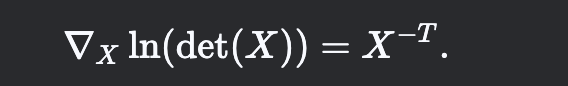

In [ ]:


import torch
import torch.nn.functional as F
import numpy as np
import torch.nn as nn

def gradient_ln_det(X):
  """
  Computes the gradient of ln(det(X)) with respect to X.

  Args:
    X: A PyTorch tensor of shape (..., n, n) representing a batch of square matrices.

  Returns:
    A PyTorch tensor of the same shape as X representing the gradient.
  """
  # Ensure X is a square matrix
  if X.shape[-1] != X.shape[-2]:
    raise ValueError("Input tensor X must be a square matrix.")

  try:
    # Compute the inverse of X
    X_inv = torch.linalg.inv(X)
  except RuntimeError:
    # Handle singular matrix cases
    print("Encountered singular matrix, returning zeros for gradient.")
    return torch.zeros_like(X)

  # Compute the gradient d(ln(det(X))) / dX = X^(-T)
  gradient = X_inv.transpose(-1,-2)

  return gradient

X = torch.randn(3, 3)

dX = torch.randn(3, 3)*0.0001

X_new = X + dX

gradient = ( torch.log(torch.linalg.det(X_new)) - torch.log(torch.linalg.det(X)) )/dX
print(gradient)

print(gradient_ln_det(X))

# Add a perbuation

In [ ]:


import torch
import torch.nn.functional as F
import numpy as np
import torch.nn as nn


rows = 1024
cols = 1024

# Create a matrix with elements from a standard normal distribution N(0, 1)
X = torch.randn(rows, cols)/torch.sqrt(torch.tensor(rows+cols))

# Add a small perturbation
dX = torch.ones(rows, cols) * 0.01

u,s,v = torch.svd(X)

Y = X + dX
u1,s1,v1 = torch.svd(Y)

print(s[0:10],s1[0:10])

# Study $\boldsymbol{X}$ and $\boldsymbol{X} \boldsymbol{X}^{\top}$

In [ ]:
import torch
import torch.nn as nn

X = torch.randn(64, 64)
X_2 = torch.mm(X, X.T)
u,s,v = torch.svd(X)
u1,s1,v1 = torch.svd(X_2)
print(s[0:10],s1[0:10])



X = torch.randn(256, 256)
X_2 = torch.mm(X, X.T)
u,s,v = torch.svd(X)
u1,s1,v1 = torch.svd(X_2)
print(s[0:10],s1[0:10])


X = torch.randn(1024, 1024)
X_2 = torch.mm(X, X.T)
u,s,v = torch.svd(X)
u1,s1,v1 = torch.svd(X_2)
print(s[0:10],s1[0:10])

#
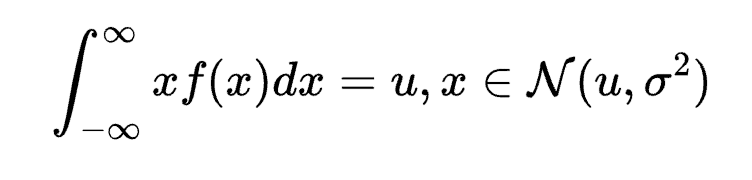

In [ ]:

import torch
import torch.nn.functional as F
import numpy as np
import torch.nn as nn

def normal_pdf(x, mean, std):
    """
    Calculates the probability density function (PDF) of a normal distribution.

    Args:
        x (torch.Tensor): The input tensor for which the PDF is calculated.
        mean (float): The mean of the normal distribution.
        std (float): The standard deviation of the normal distribution.

    Returns:
        torch.Tensor: The PDF values for the input tensor.
    """
    return (1. / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std) ** 2)



def simulate_integral(u, sigma, num_samples=100000):
  """
  Simulates the integral of x * f(x) dx, where f(x) is a normal distribution.

  Args:
    u: The mean of the normal distribution.
    sigma: The standard deviation of the normal distribution.
    num_samples: The number of samples to use for the Monte Carlo simulation.

  Returns:
    The estimated value of the integral.
  """
  # Generate random samples from the normal distribution.
  x = torch.normal(mean=u, std=sigma, size=(num_samples,))

  # Calculate the integrand for each sample
  integrand = x

  # Estimate the integral using Monte Carlo method.
  integral_estimate = torch.mean(integrand)

  return integral_estimate.item()

# Example usage:
u = 2.0
sigma = 1.5
integral_value = simulate_integral(u, sigma)

print(f"The simulated value of the integral is: {integral_value}")

sum = []
dx = 0.001
bins = np.arange(-1000, 1000, dx)
for _, x in enumerate(bins):
  sum.append(x*normal_pdf(x, 2.0, 1.5)*dx)


print(np.sum(np.array(sum)))




#  Eigenvalue decomposition
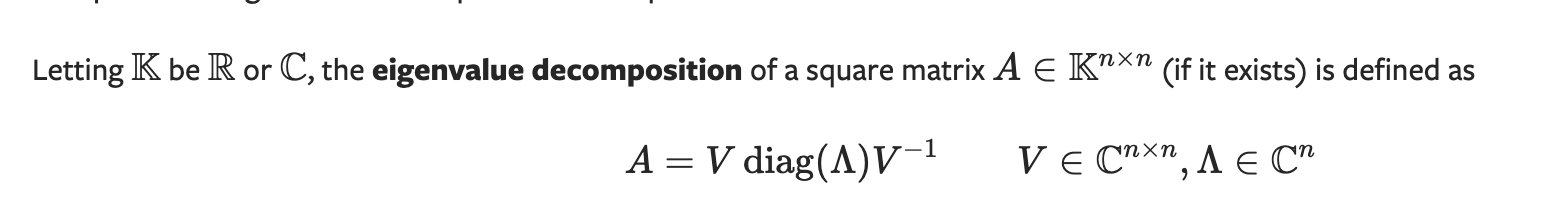

In [ ]:


import torch
import torch.nn.functional as F
import numpy as np
import torch.nn as nn

matrix = [[1,2],[3,4]]

# Example matrix (replace with your actual matrix)
matrix = torch.tensor(matrix, dtype=torch.float32)

# Perform eigenvalue decomposition
Lambda, V = torch.linalg.eig(matrix)

V_inv = torch.linalg.inv(V)

V_mm_V_inv = torch.mm(V, V_inv)
print(V_mm_V_inv)

print("Eigenvalues:", Lambda)
print("Eigenvectors:", V)

# write code to implement least-square error

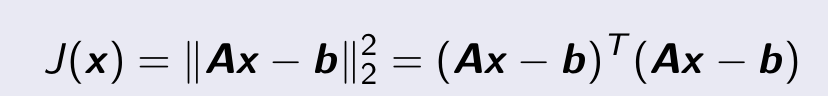

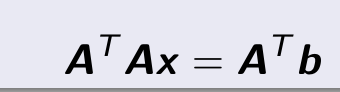

In [ ]:
import torch

gt = torch.randn(10,1)

A = torch.randn(100, 10)

b = torch.mm(A, gt) + torch.randn(100,1)*0.01

estimated_values = torch.linalg.inv(torch.mm(A.T, A)).mm(A.T).mm(b)


# Calculate the least-squares error
error = gt - estimated_values
squared_error = error ** 2
least_squares_error = torch.sum(squared_error) / len(gt)


print("Ground Truth Values:", gt)
print("Estimated Values:", estimated_values)
print("Least Squares Error:", least_squares_error)